# Capstone EDA
By : Pythonic Minds

In [96]:
# Table of Contents  

In [97]:
## 1. Overview of the Project

### **a. Business Problems**
Home Credit aims to expand financial services to the unbanked population, where traditional credit history is limited or non-existent. To assess creditworthiness, they supplement loan applications with alternative data such as transaction records and telecom behavior.

The business objective is to predict the likelihood of loan default, where 0 indicates no default and 1 represents at least one late payment. Accurately predicting defaults will help Home Credit minimize losses and promote financial inclusion while ensuring responsible lending. This project aims to build a predictive model to assess clients' loan repayment ability using available data.

### **b. Analytical Methodology**
Default risk prediction will be generated using a supervised machine learning classification model. Historical loan application data will be split into two sets, 80% for training and 20% for test. A model will be built based on the trained dataset and test its performance on the test set. The model will analyze factors like applicant demographics, credit history, past loan performance and repayment behavior to predict the likeliness of clients’ default on loans.

### **c. Goal**
Reducing the likelihood of default: by identifying the main predictors that are positively and negatively correlated with it

## **2. Introduction**
The notebook begins by exploring the application_train.csv file, which contains key demographic information about the applicants, such as age, income, along with their credit history and other significant documents. Throughout the notebook, extensive data cleaning is performed to ensure the dataset is in optimal shape for analysis. Furthermore, the notebook focuses on identifying the most important predictors that influence the likelihood of defaulting. By carefully removing unnecessary rows and columns, the analysis reduces noise and enhances the model's overall efficiency

## 3. Importing Packages

In [98]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Loading Data

In [99]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# define the function for reducing memory usage when importing data
def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [100]:
#reading the csv file  ### FIXED by removing custom user directory path.
application_train_df = reduce_memory_usage(pd.read_csv("application_train.csv"))
bureau_df = reduce_memory_usage(pd.read_csv('bureau.csv'))
bureau_balance_df = reduce_memory_usage(pd.read_csv('bureau_balance.csv'))
credit_card_balance_df = reduce_memory_usage(pd.read_csv("credit_card_balance.csv"))
installments_payments_df = reduce_memory_usage(pd.read_csv("installments_payments.csv"))
POS_CASH_balance_df =  reduce_memory_usage(pd.read_csv("POS_CASH_balance.csv"))
previous_application_df = reduce_memory_usage(pd.read_csv("previous_application.csv"))

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


In [101]:
### FIXED
application_test_df  = reduce_memory_usage(pd.read_csv("application_test.csv"))

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%



## 5. Data Exploration
In this section, we will understand different features of the all the datasets.


In [102]:
#getting a summary statistics and shape of the application dataset
summary = application_train_df.describe()
display(summary)
print(application_train_df.shape)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.000000,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.0,0.0,0.0,NaN,NaN,NaN
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737305,3.694465e+05,0.000000,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.0,0.0,0.0,0.0,0.0,0.0
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010010,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018845,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028656,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072510,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.0,9.0,8.0,27.0,261.0,25.0


(307511, 122)


In [103]:
#getting a summary statistics and shape of the bureau_df dataset
summary = bureau_df.describe()
display(summary)
print(bureau_df.shape)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1610875.0,1082775.0,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,NaN,NaN,3.825417e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229514e+03,3.791277e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,0.0,0.0,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-42048.0,-42016.0,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1138.0,-1489.0,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-330.0,-897.0,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,474.0,-425.0,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,31200.0,0.0,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


(1716428, 17)


In [104]:
#getting a summary statistics and shape of the bureau_balance_df dataset
summary = bureau_balance_df.describe()
display(summary)
print(bureau_balance_df.shape)

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


(27299925, 3)


In [105]:
#getting a summary statistics and shape of the credit_card_balance_df dataset
summary = credit_card_balance_df.describe()
display(summary)
print(credit_card_balance_df.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3090496.0,3.840312e+06,3090496.0,3090496.0,3535076.0,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961323e+03,7.433390e+03,2.881696e+02,2.968804e+03,3.540206e+03,...,5.596585e+04,5.808884e+04,5.809825e+04,NaN,7.031439e-01,0.0,NaN,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,0.0,3.190347e+00,0.0,0.0,0.0,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,4.0,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,15.0,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.0,0.000000e+00,0.0,0.0,32.0,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,51.0,1.650000e+02,12.0,165.0,120.0,3.260000e+03,3.260000e+03


(3840312, 23)


In [106]:
#getting a summary statistics and shape of the installments_payments_df dataset
summary = installments_payments_df.describe()
display(summary)
print(installments_payments_df.shape)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,13605401.0,1.360540e+07,13605401.0,13602496.0,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,NaN,1.887090e+01,NaN,NaN,1.705092e+04,1.723821e+04
std,5.362029e+05,1.027183e+05,0.0,2.666407e+01,0.0,0.0,5.057025e+04,5.473579e+04
min,1.000001e+06,1.000010e+05,0.0,1.000000e+00,-2922.0,-4920.0,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.0,4.000000e+00,-1654.0,-1662.0,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.0,8.000000e+00,-818.0,-827.0,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.0,1.900000e+01,-361.0,-370.0,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,178.0,2.770000e+02,-1.0,-1.0,3.771488e+06,3.771488e+06


(13605401, 8)


In [107]:
#getting a summary statistics and shape of the POS_CASH_balance_df dataset
summary = POS_CASH_balance_df.describe()
display(summary)
print(POS_CASH_balance_df.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9975287.0,9975271.0,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,NaN,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,0.0,0.0,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.0,0.0,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,10.0,3.0,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,12.0,7.0,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,24.0,14.0,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,92.0,85.0,4.231000e+03,3.595000e+03


(10001358, 8)


In [108]:
#getting a summary statistics and shape of the previous_application_df dataset
summary = previous_application_df.describe()
display(summary)
print(previous_application_df.shape)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1297984.0,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.0
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697401e+03,2.278472e+05,1.248418e+01,9.964675e-01,0.000000,...,0.774902,-8.806797e+02,3.139511e+02,NaN,342209.781250,13826.266602,33767.769531,76582.406250,81992.343750,NaN
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.000000,...,0.100708,7.790997e+02,7.127443e+03,0.0,88916.117188,72444.867188,106857.039062,149647.421875,153303.515625,0.0
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373047,-2.922000e+03,-1.000000e+00,0.0,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.0
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715820,-1.300000e+03,-1.000000e+00,6.0,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.0
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.834961,-5.810000e+02,3.000000e+00,12.0,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.0
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108887,...,0.852539,-2.800000e+02,8.200000e+01,24.0,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.0
max,2.845382e+06,4.562550e+05,4.180582e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,84.0,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.0


(1670214, 37)


In [109]:
### a. Exploring Target Variable

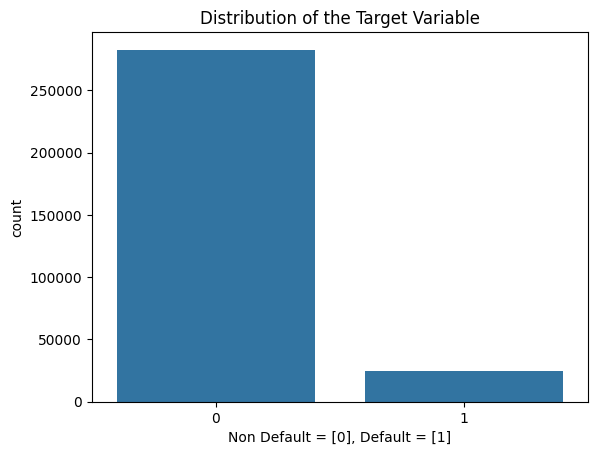

In [110]:
sns.countplot(x = application_train_df['TARGET'])
plt.title('Distribution of the Target Variable')
plt.xlabel('Non Default = [0], Default = [1]')
plt.show()

In [111]:
# Obtaining Target variable proportion
target_prop = round(application_train_df.value_counts(subset='TARGET', normalize=True),2)
print(target_prop)

print(f'The proportion of Non Defaulters [0] is {target_prop[0]}')
print(f'The proportion of Defaulters [1] is {target_prop[1]} ')


TARGET
0    0.92
1    0.08
Name: proportion, dtype: float64
The proportion of Non Defaulters [0] is 0.92
The proportion of Defaulters [1] is 0.08 


Data Description:
It appears we have a higher proportion of clients not having payment difficulties on loans compared to clients that have payment difficulties.
The above countplot illustrates this with a proportion of 92% for non default compared to 8% for default.

Additionally we have roughly 300,000 rows of data on the Train set with 122 columns
whereas we have 48,000 rows of data on the Test set with 121 columns (as it excludes the Target variable)

### b. Plots

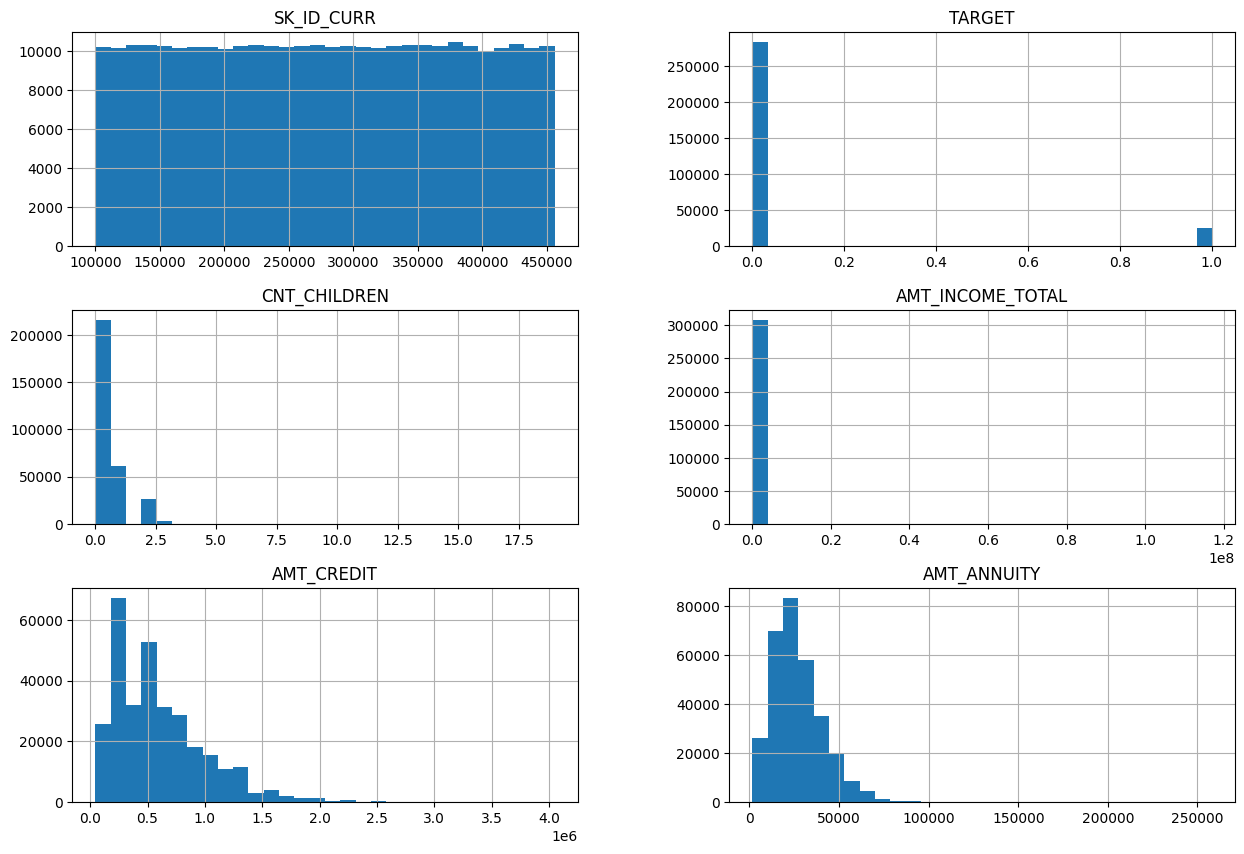

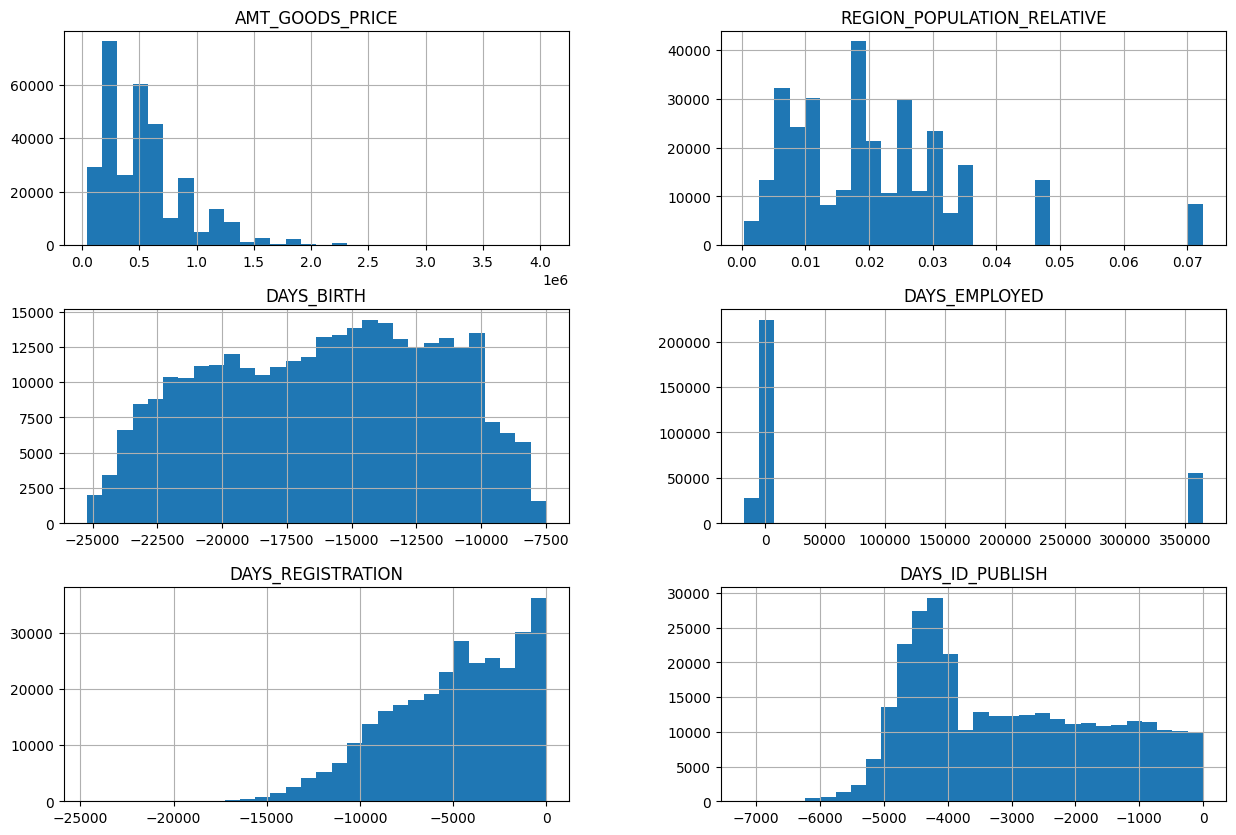

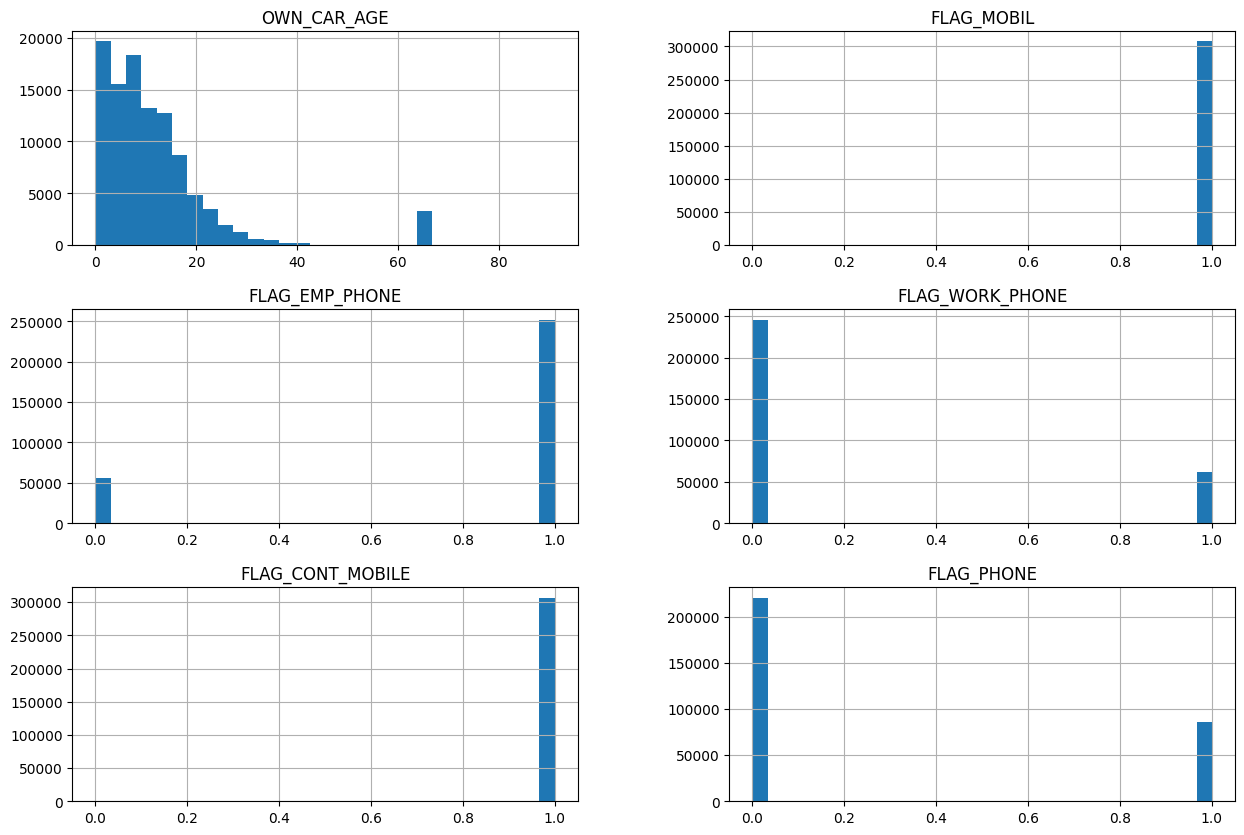

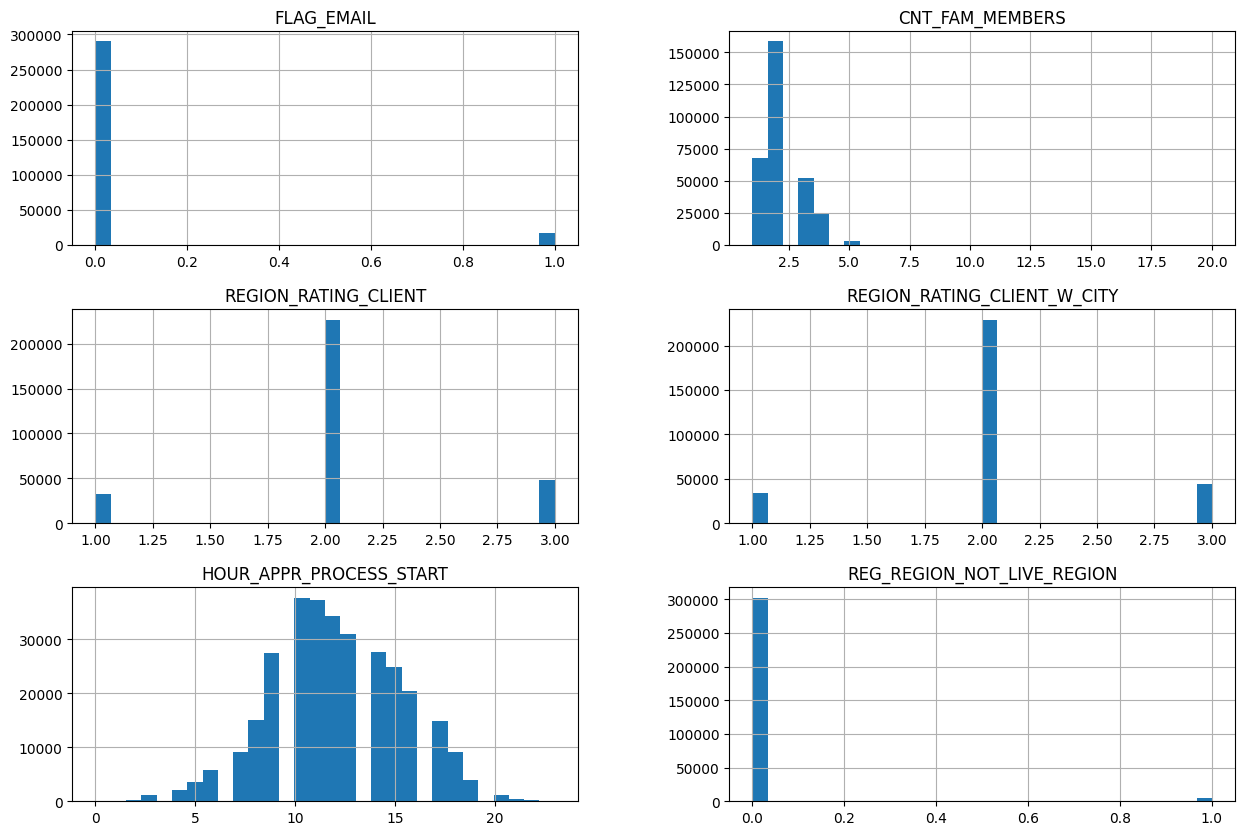

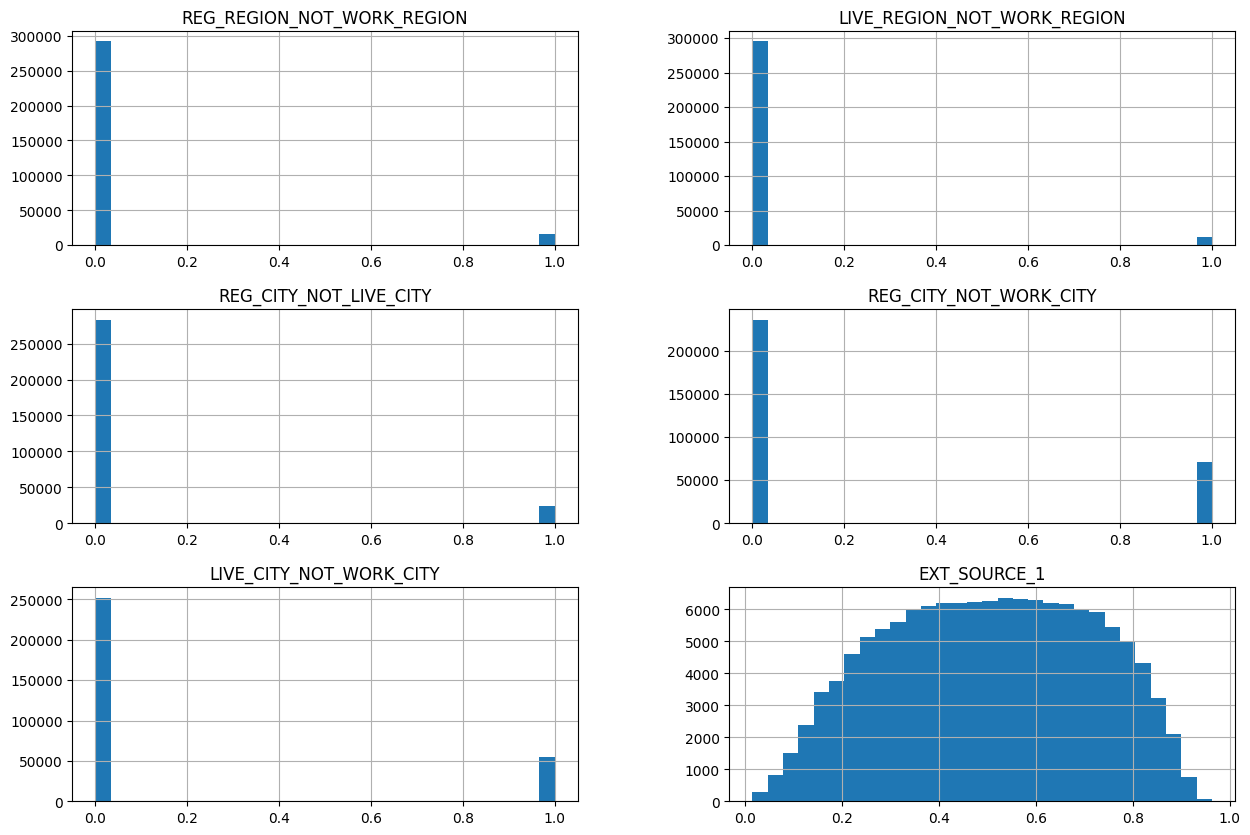

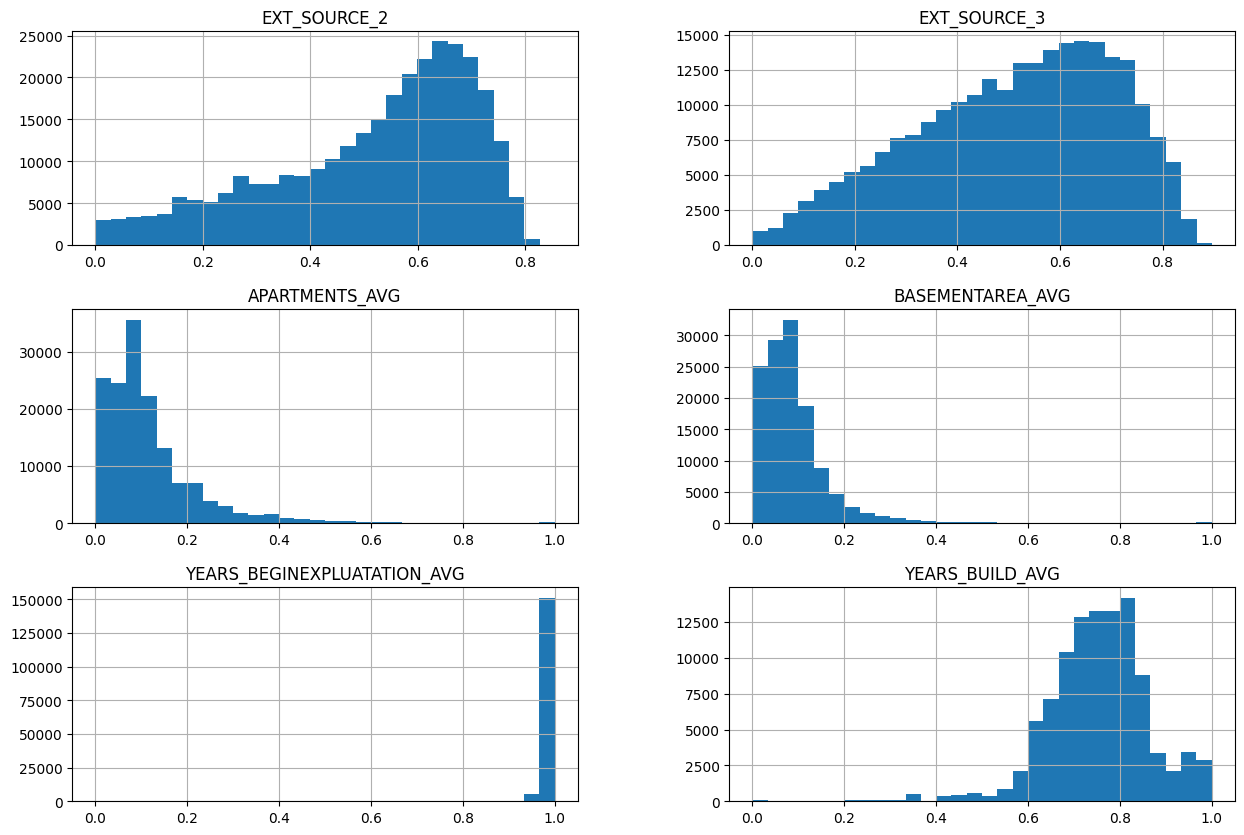

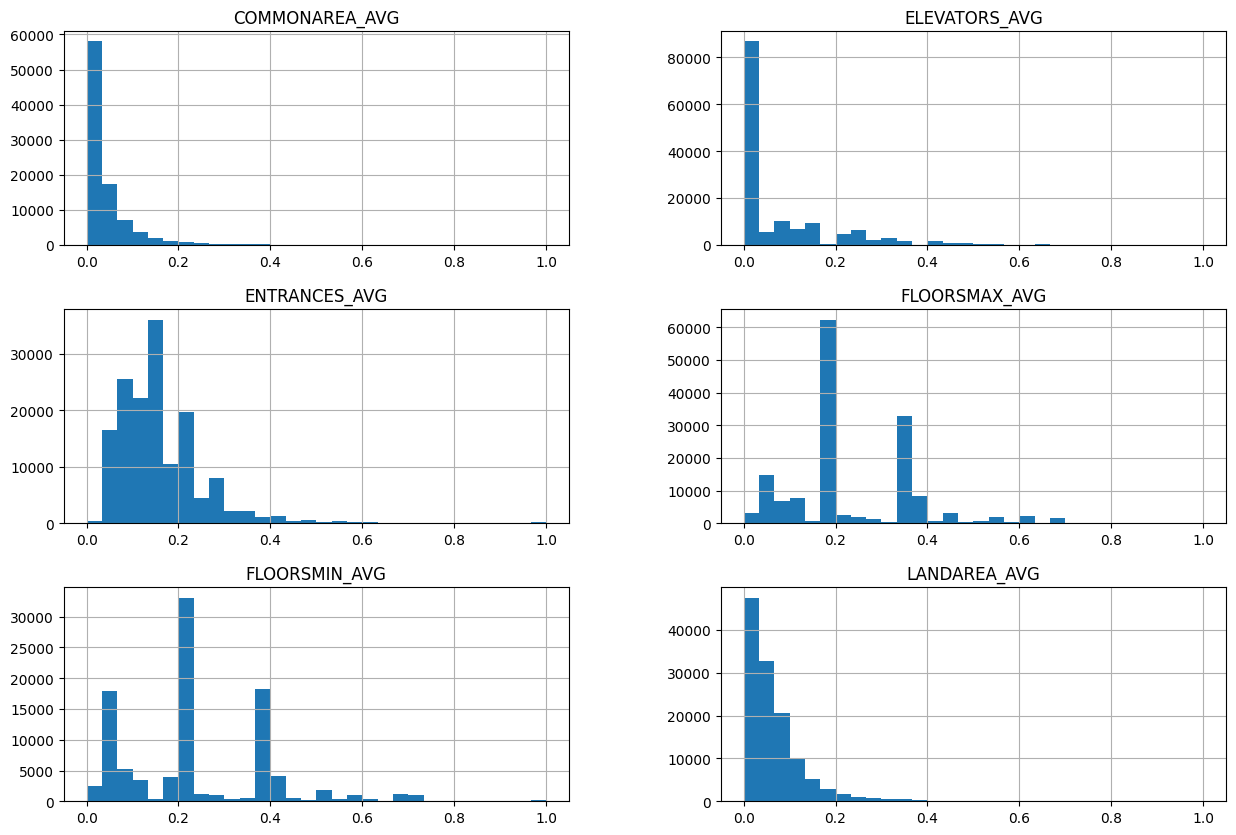

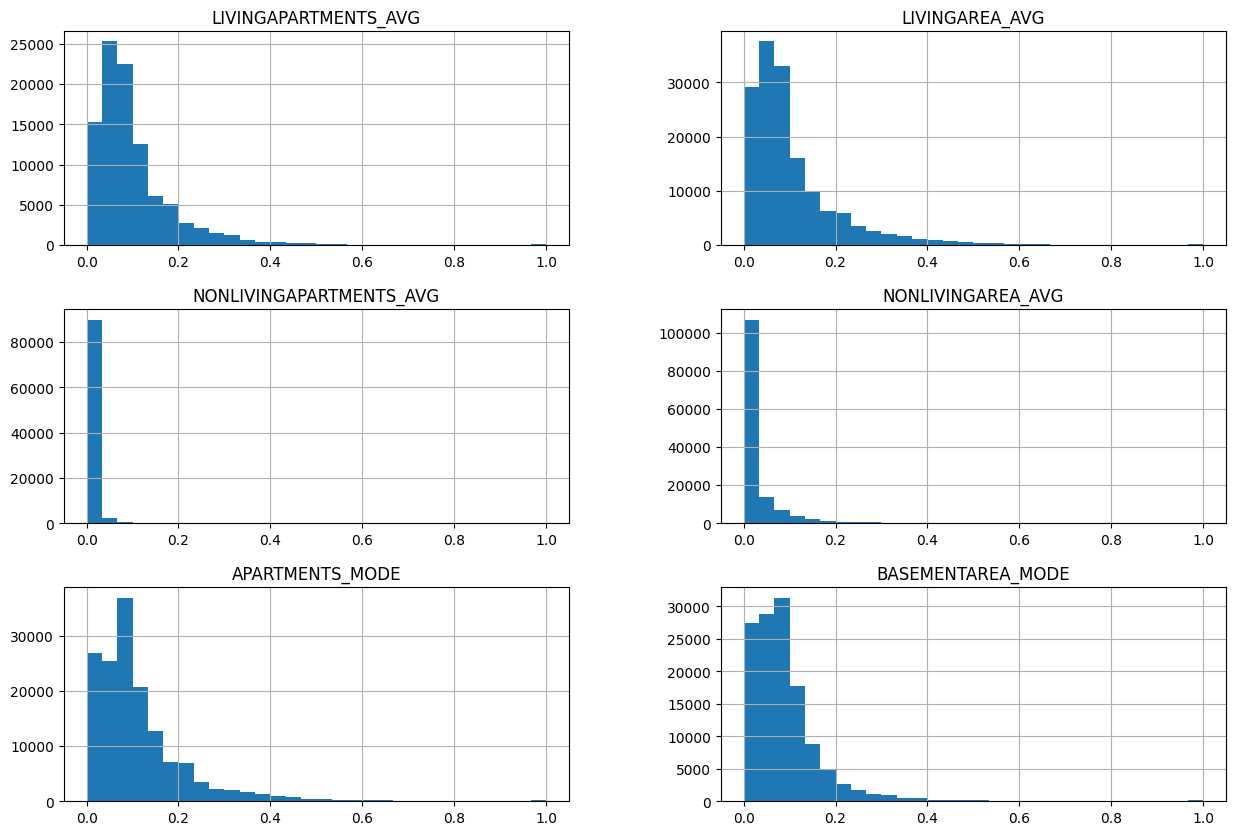

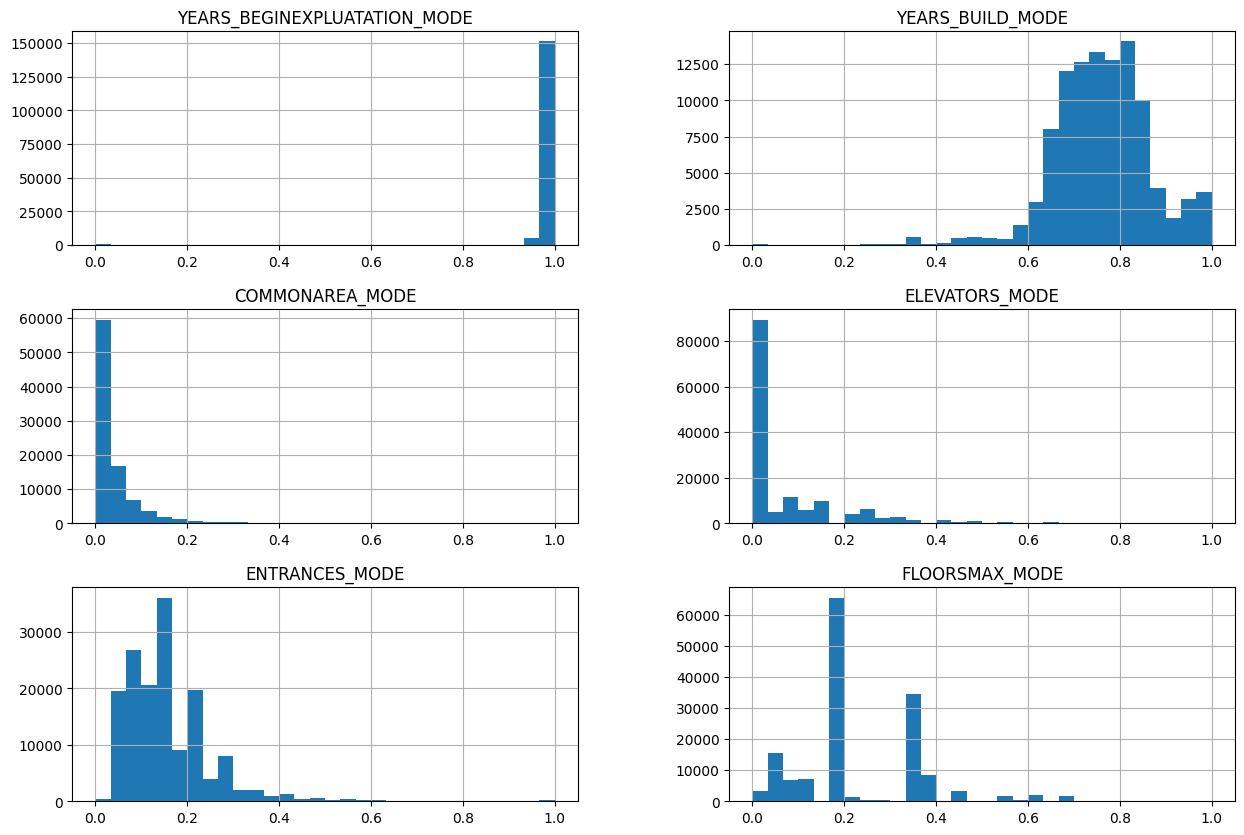

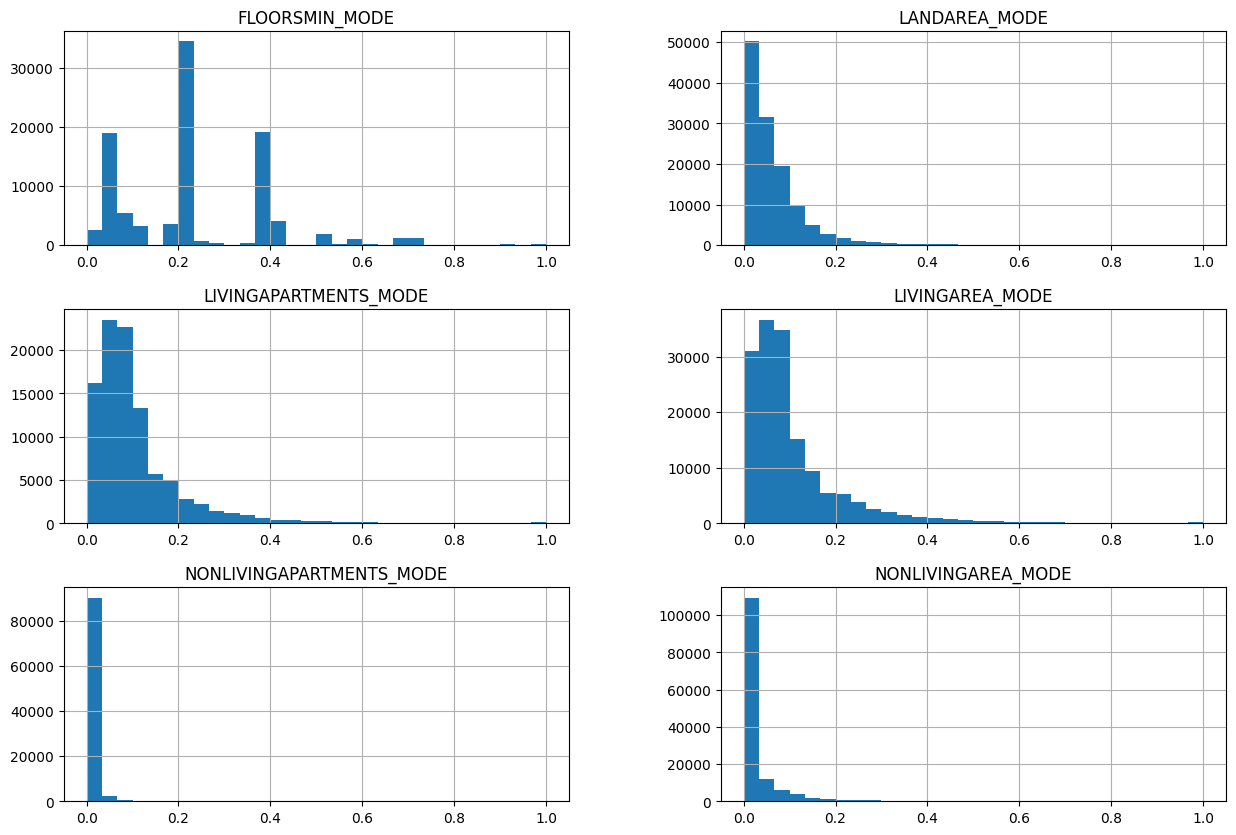

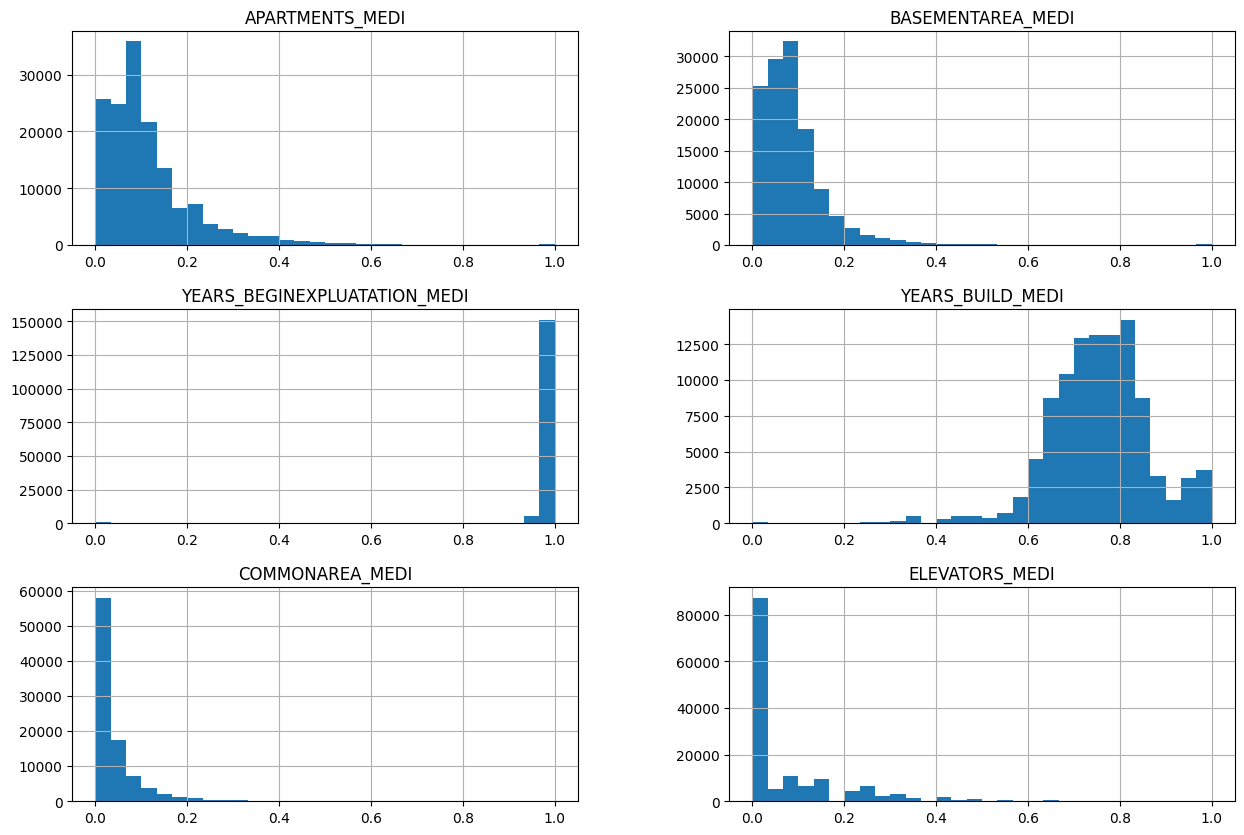

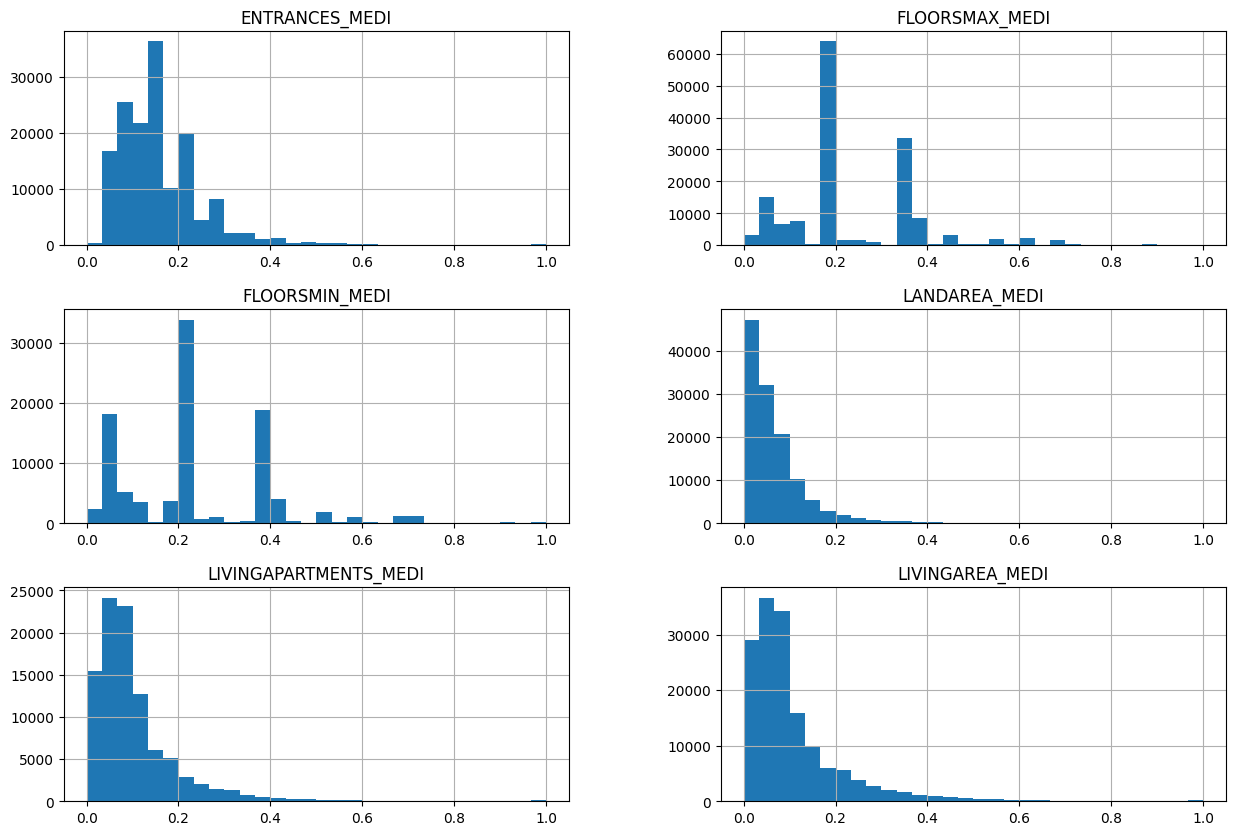

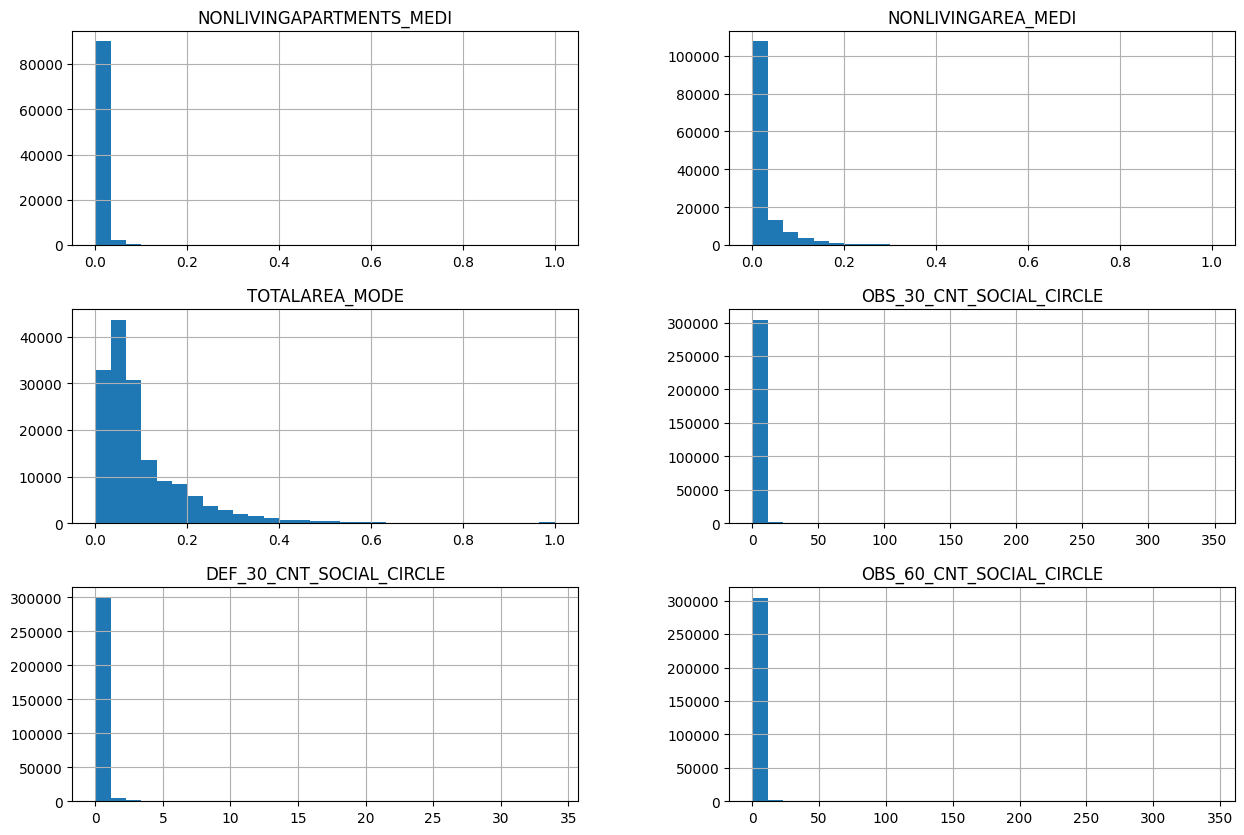

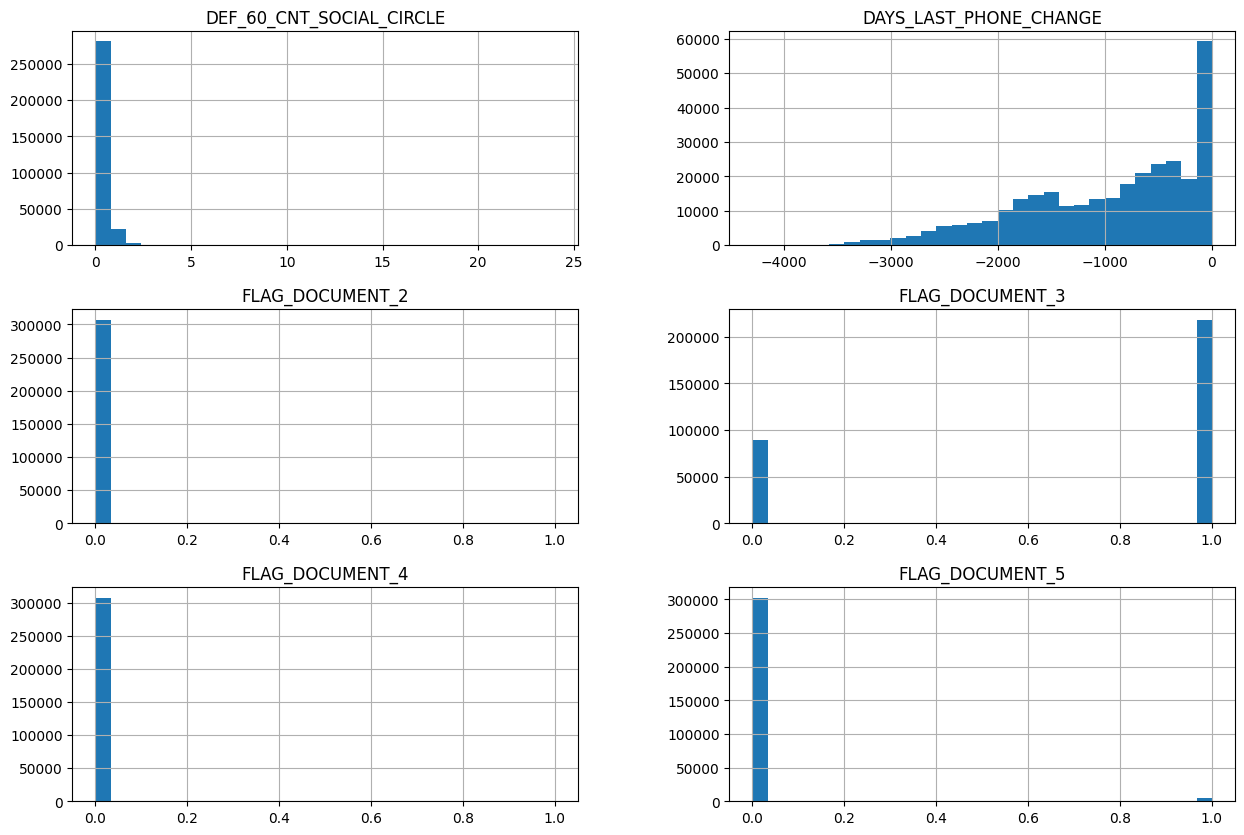

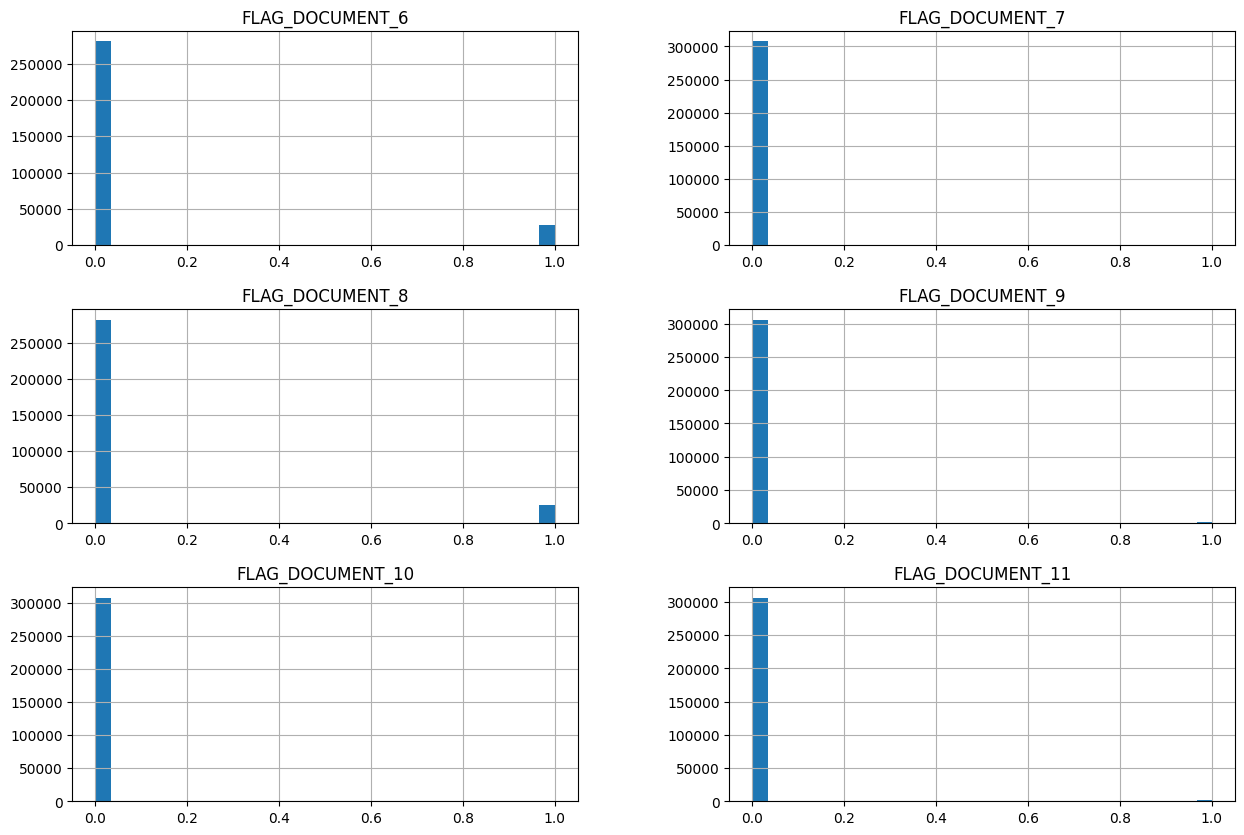

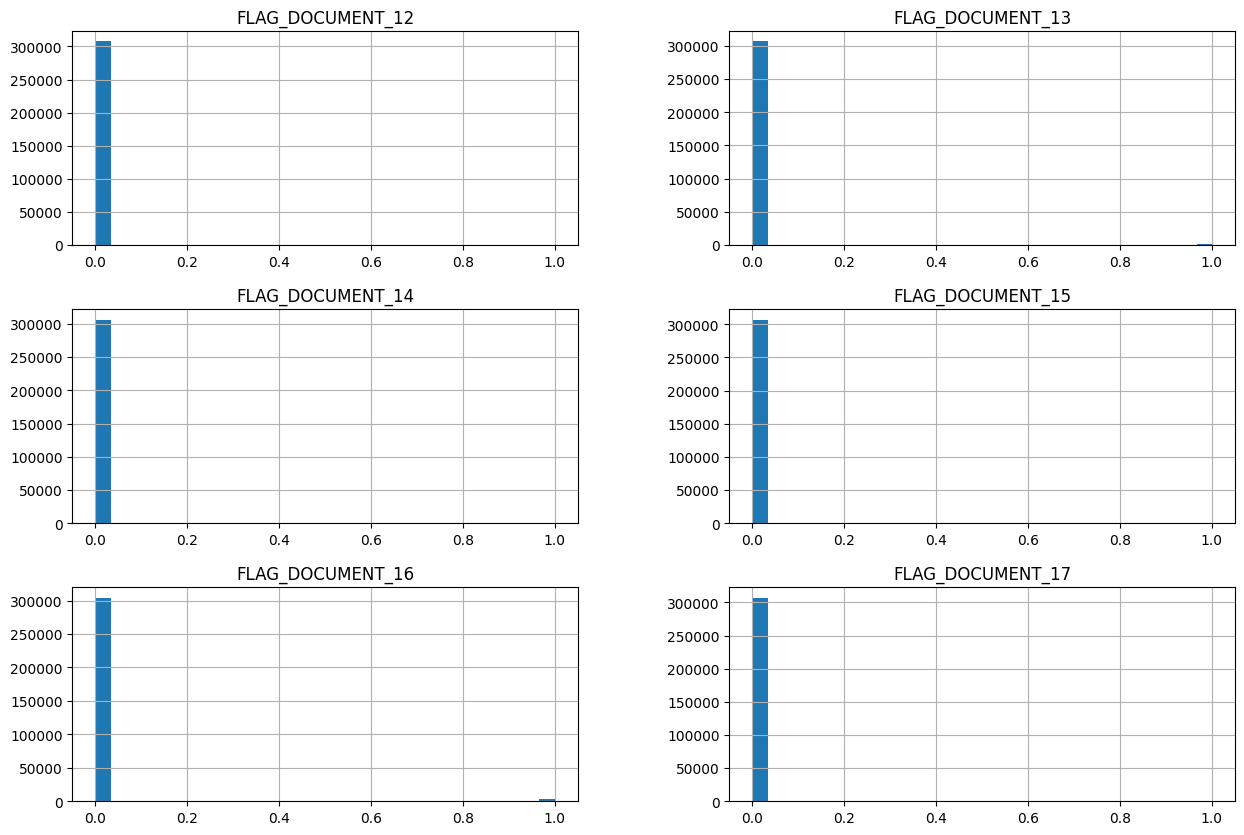

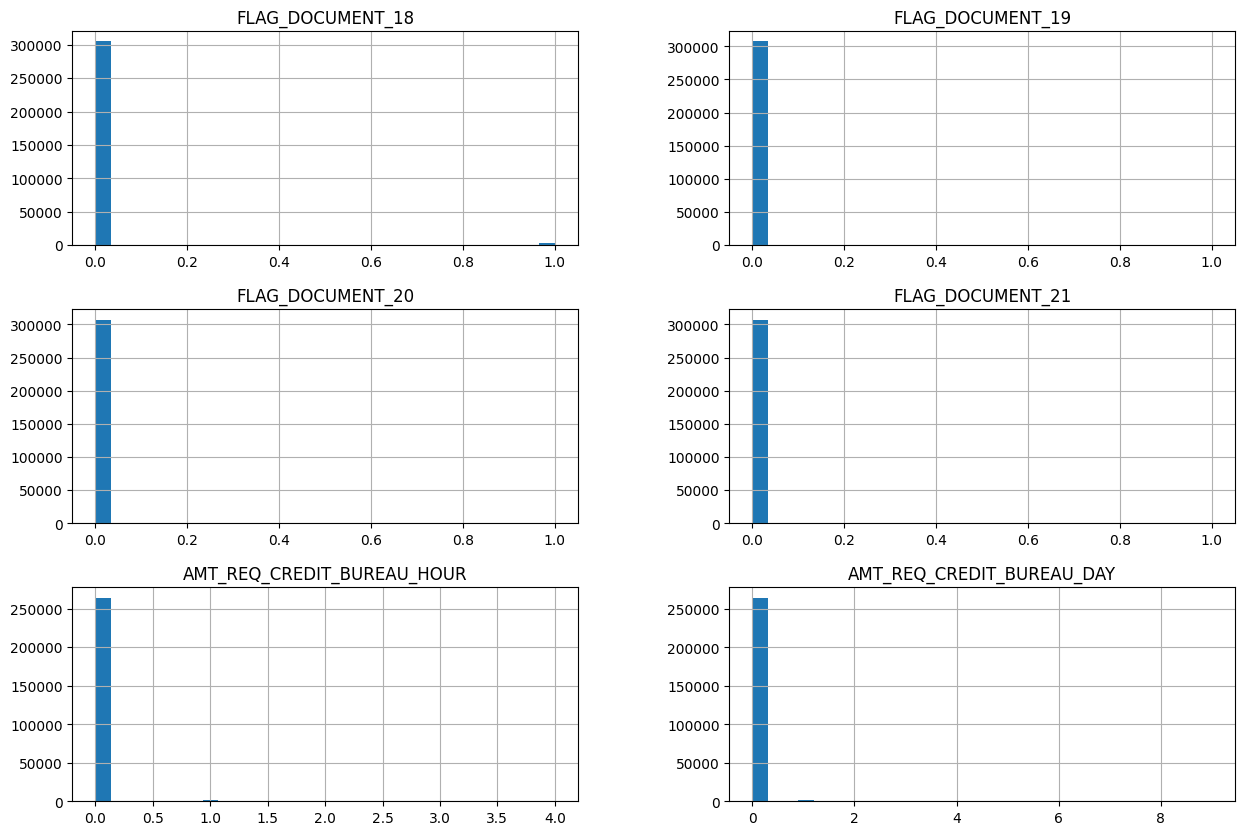

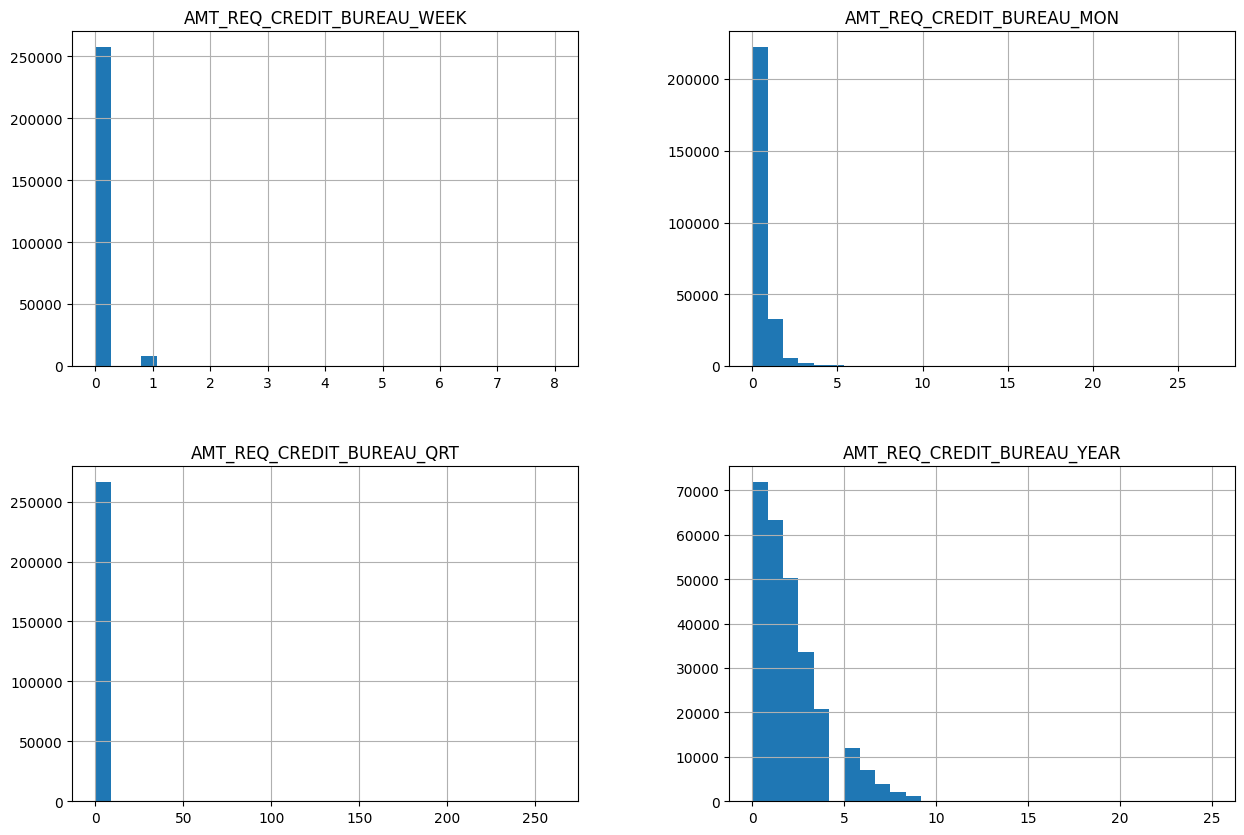

In [112]:
# Plot distribution on numerical columns
# Select numerical columns
num_cols = application_train_df.select_dtypes(include=['number']).columns

# Define batch size for better visualization
batch_size = 6  
num_batches = int(np.ceil(len(num_cols) / batch_size))

# Plot in smaller groups
for i in range(num_batches):
    batch_cols = num_cols[i * batch_size:(i + 1) * batch_size]
    application_train_df[batch_cols].hist(figsize=(15, 10), bins=30)
    plt.show()


Since the following features have low variations, we can remove them from our analysis:

1. FLAG DOCUMENT 13
2. FLAG DOCUMENT 16

In [113]:
# drop FLAG DOCUMENT 13 and 16
application_train_df = application_train_df.drop(columns=['FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16'])

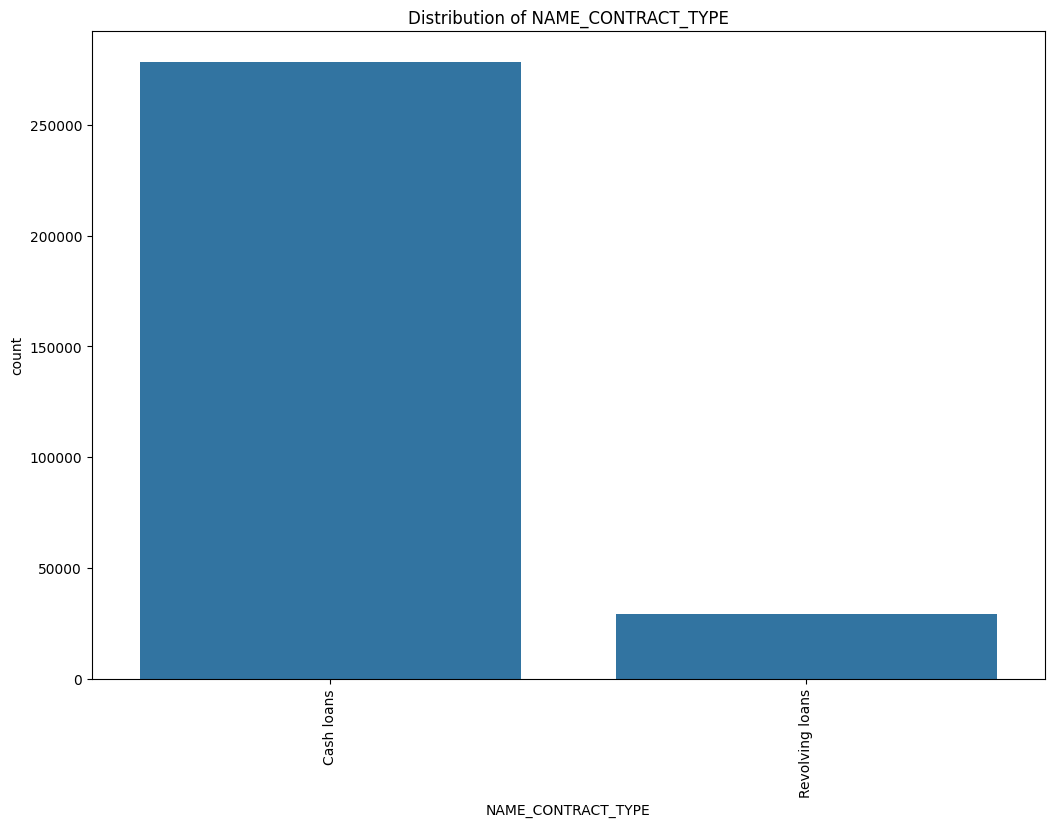

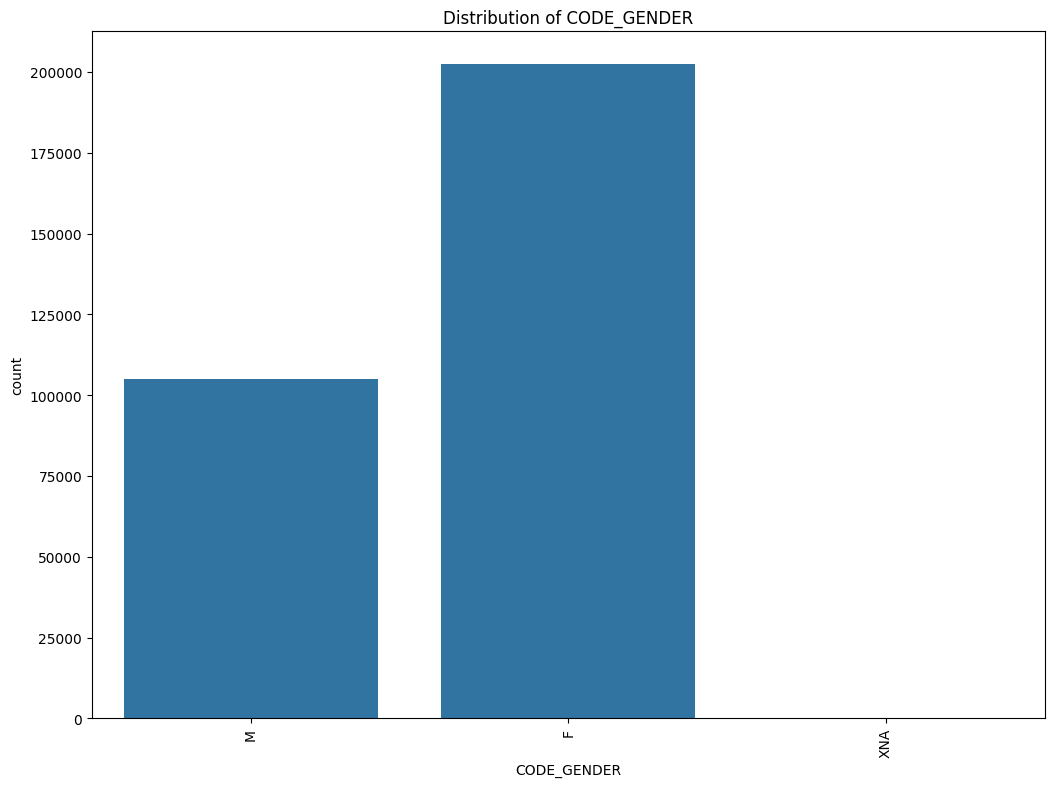

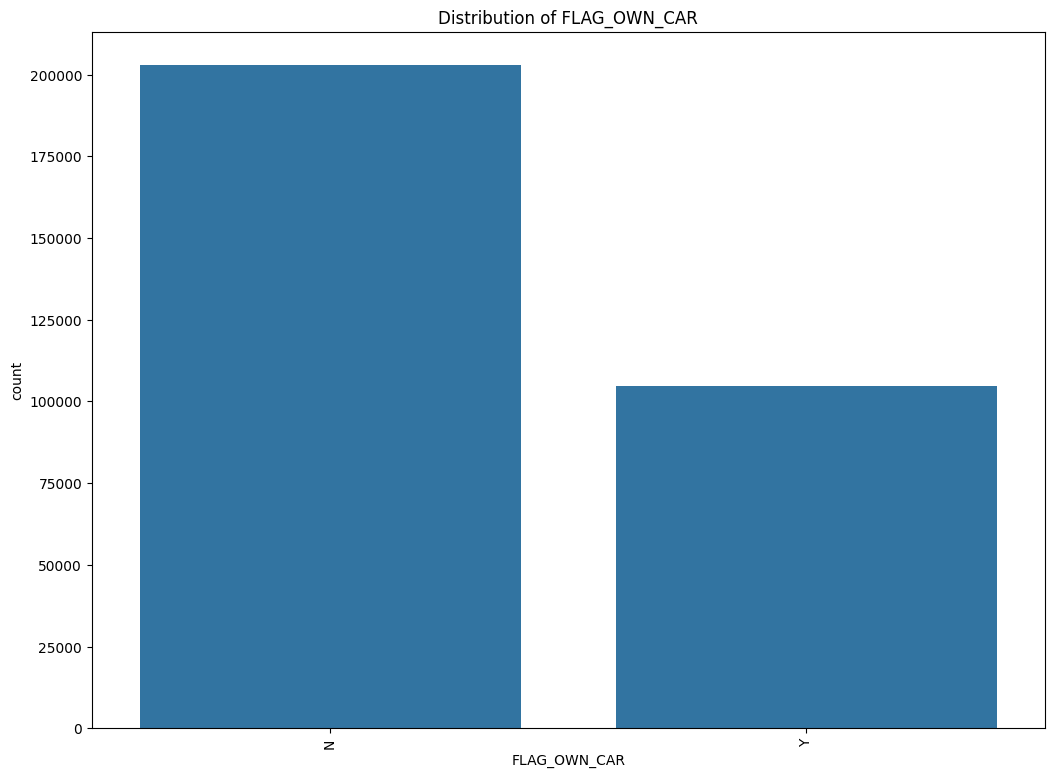

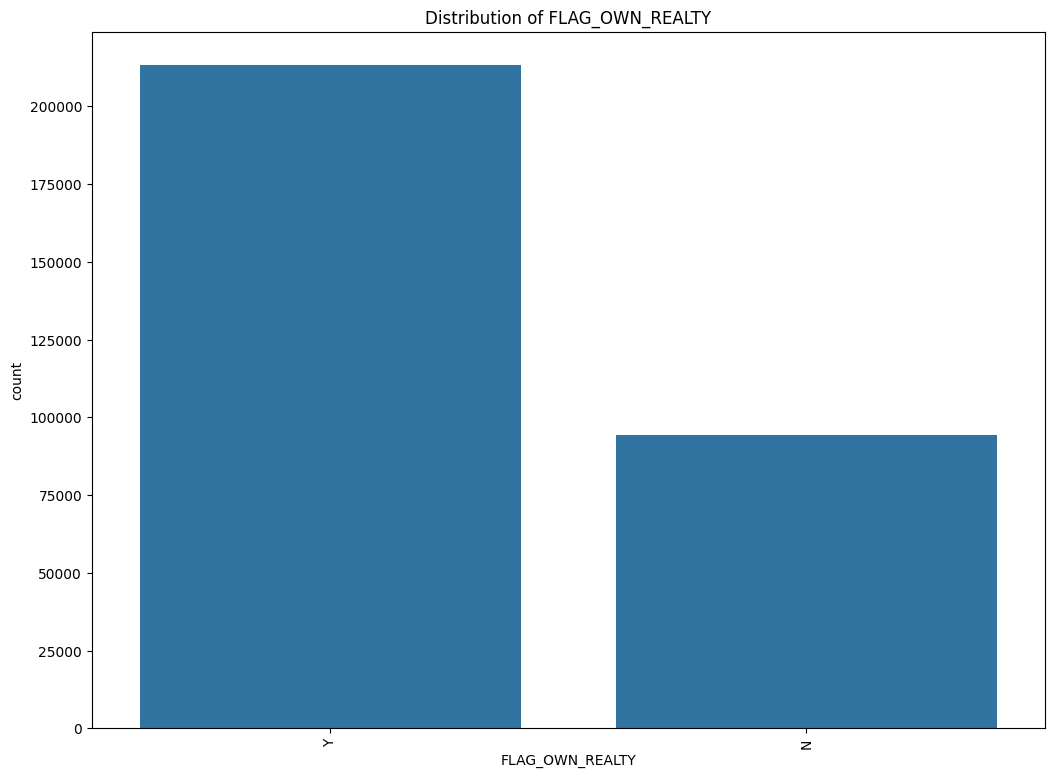

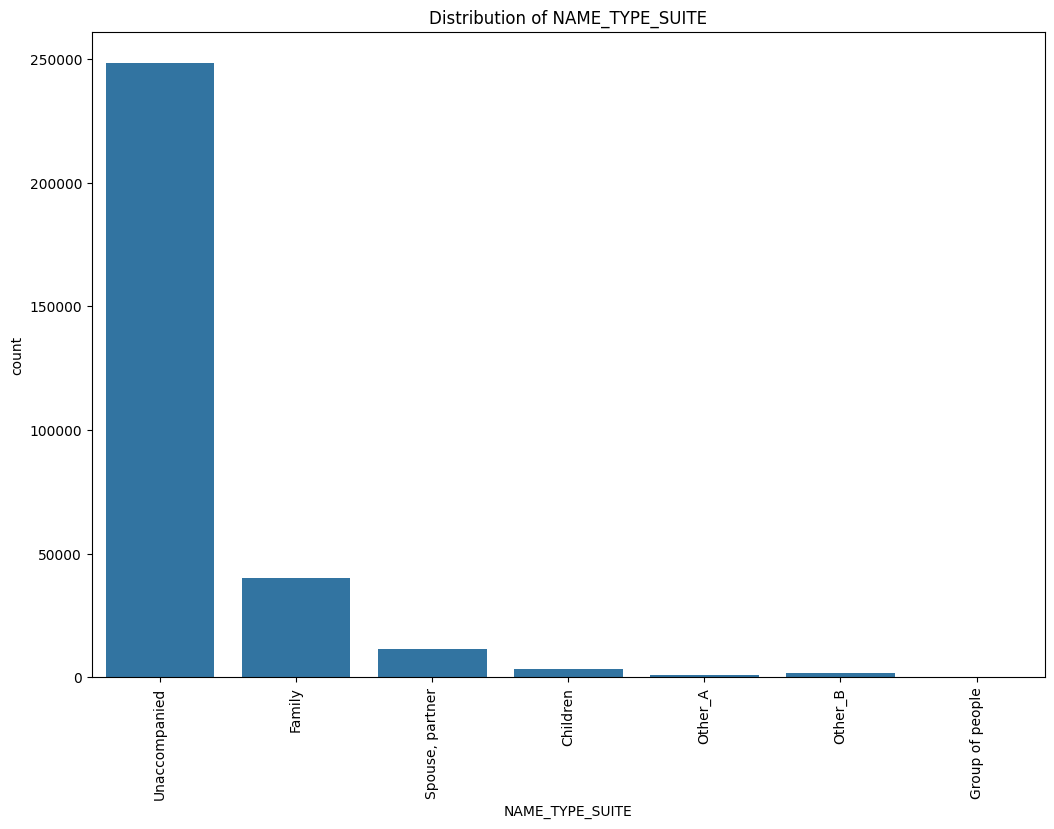

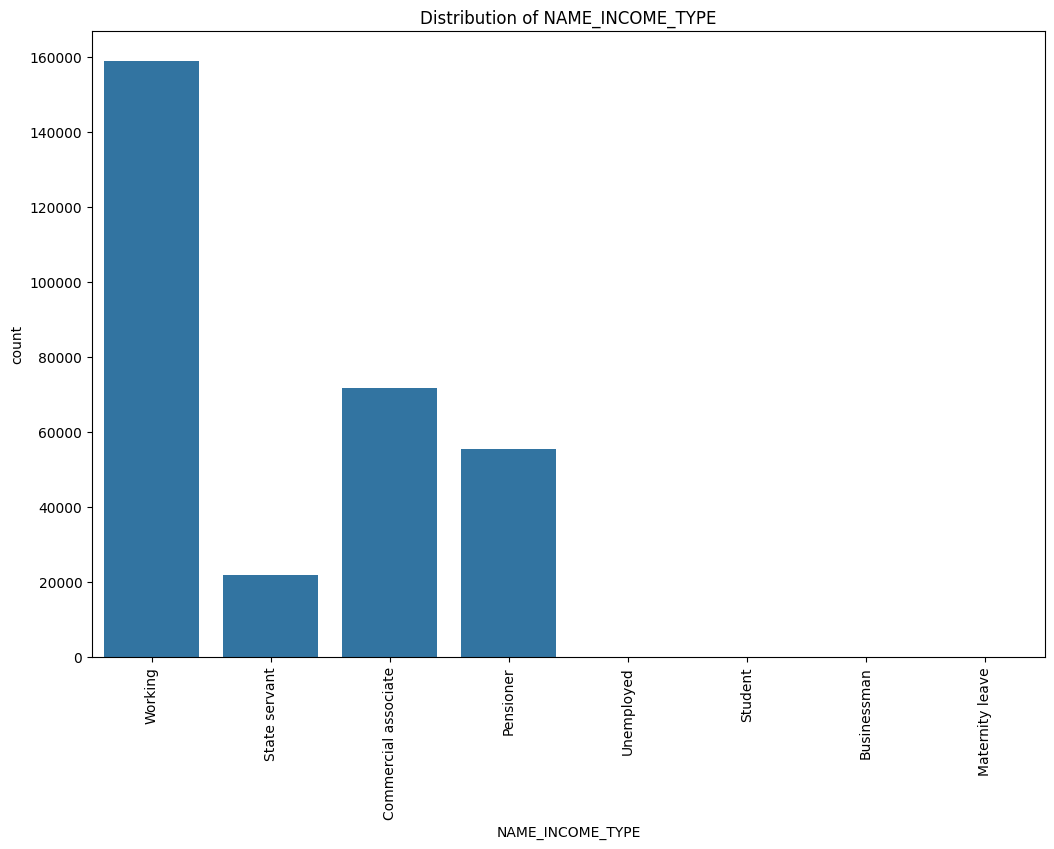

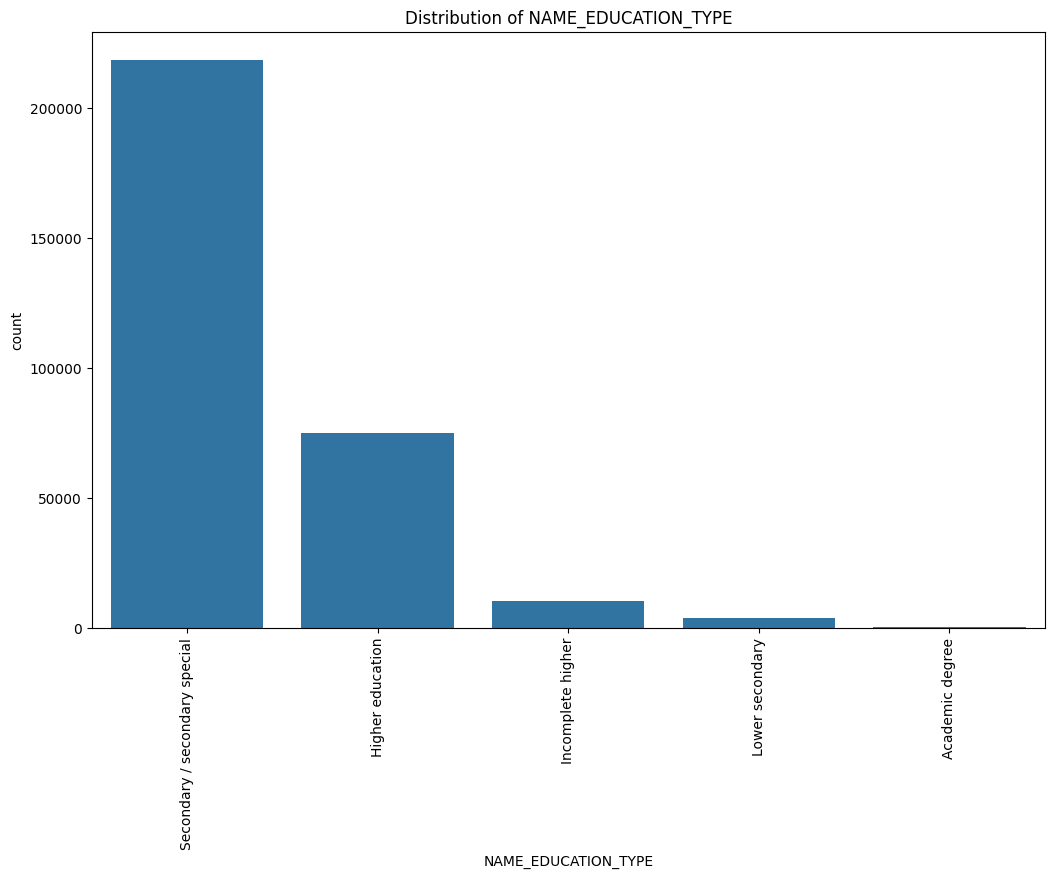

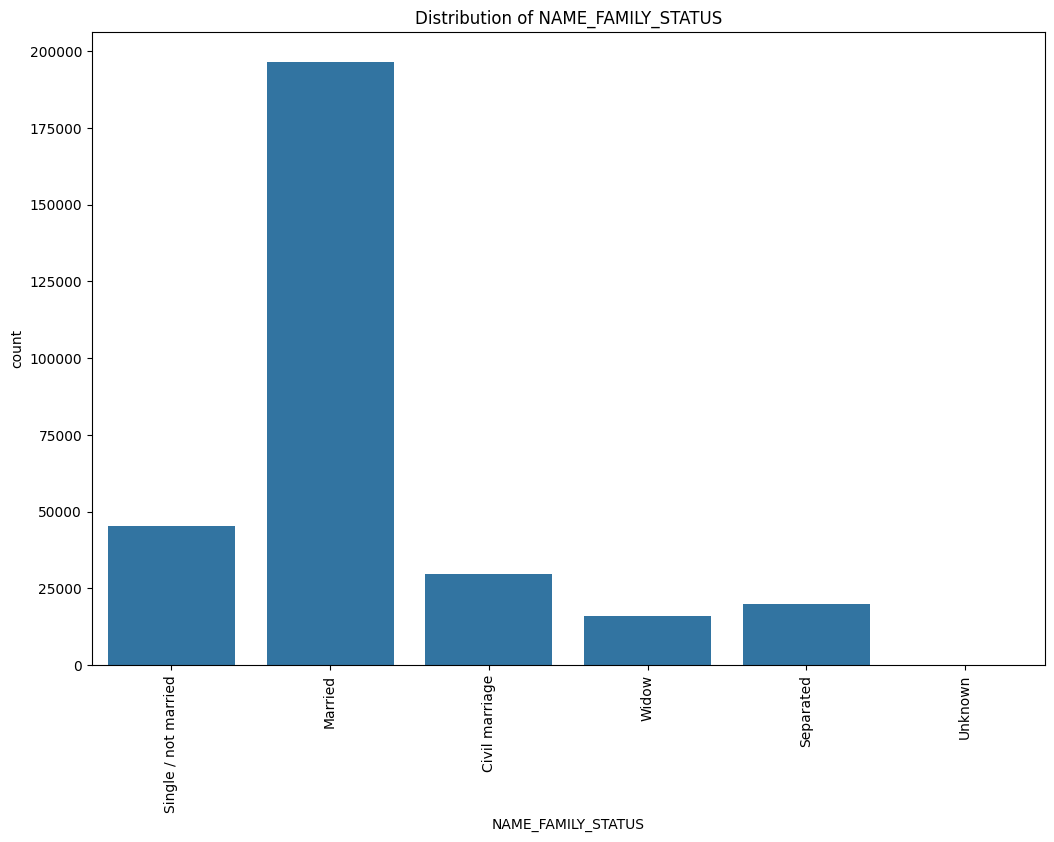

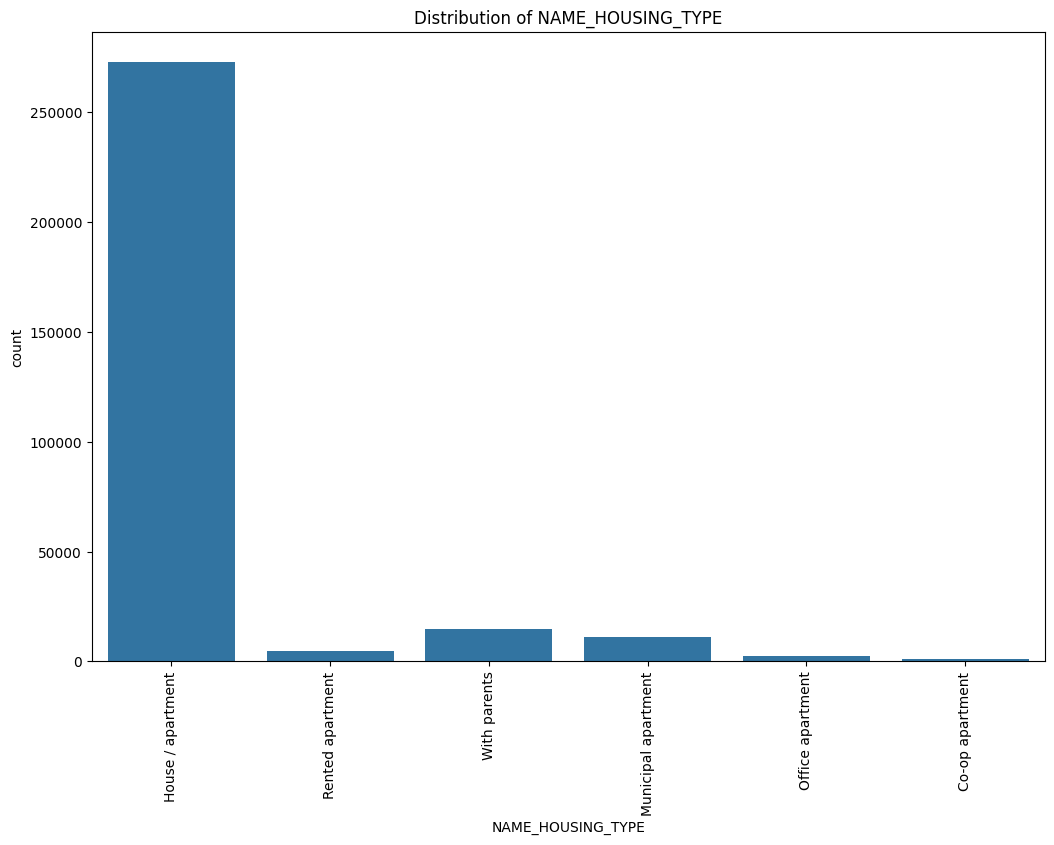

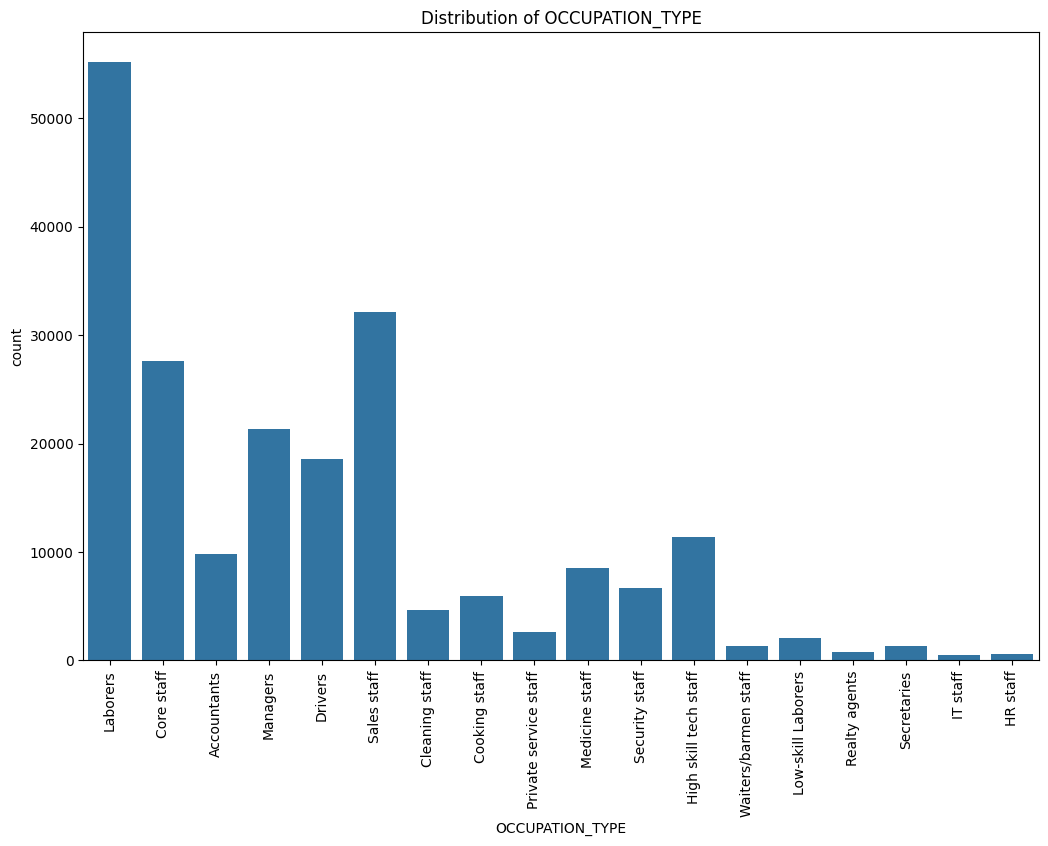

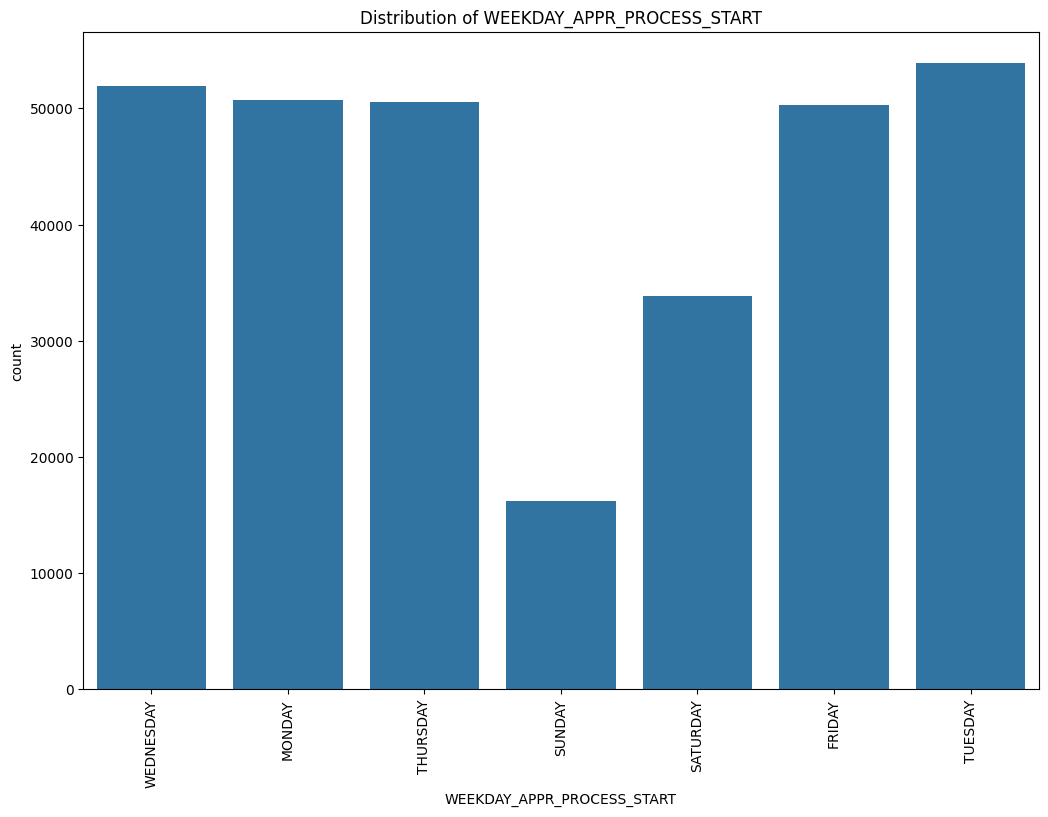

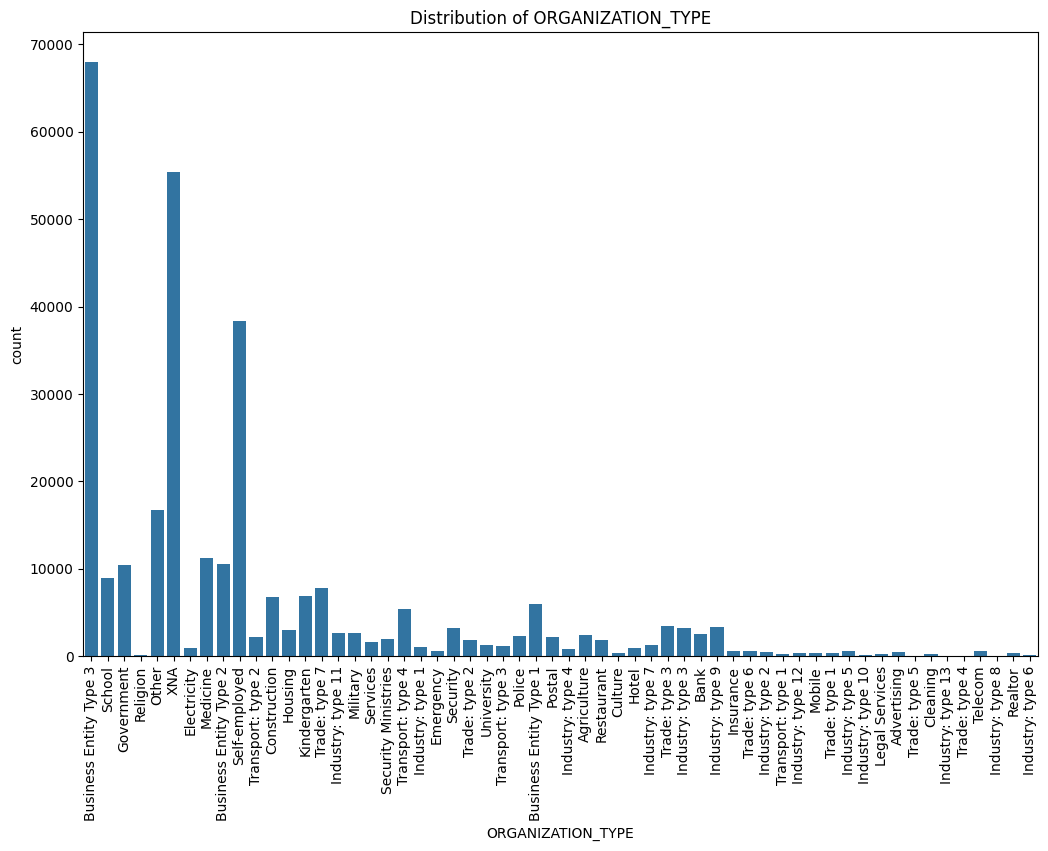

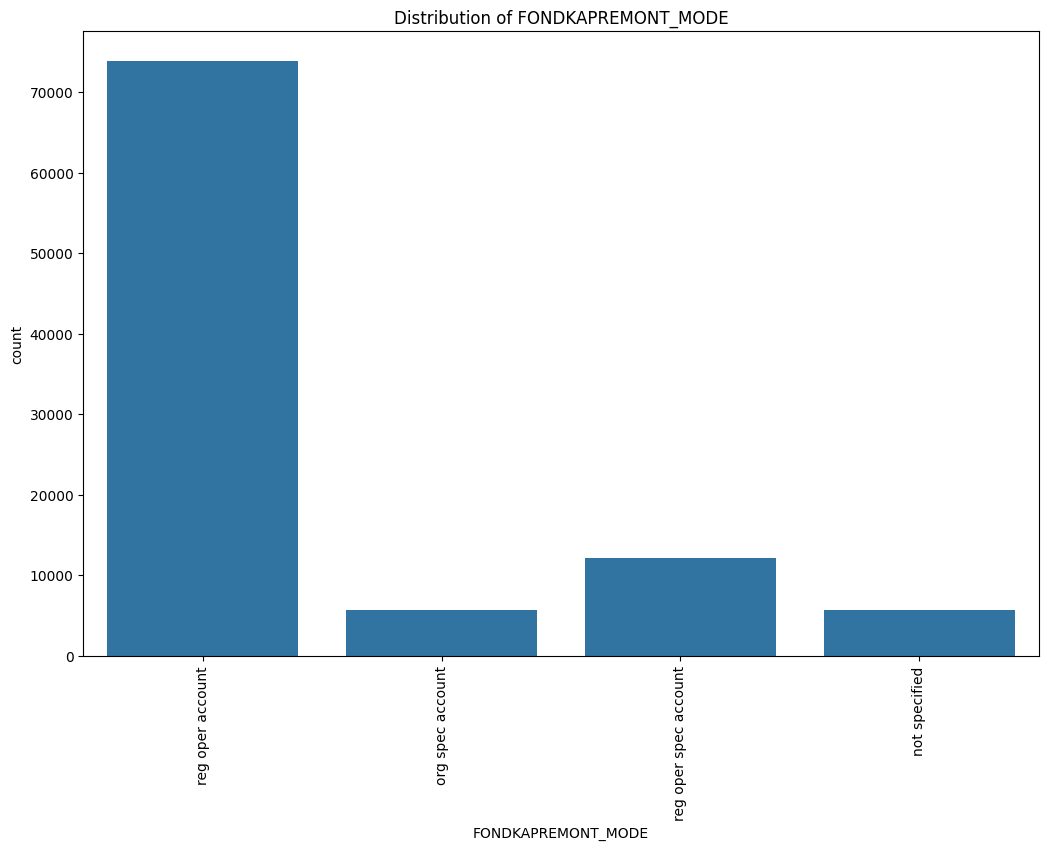

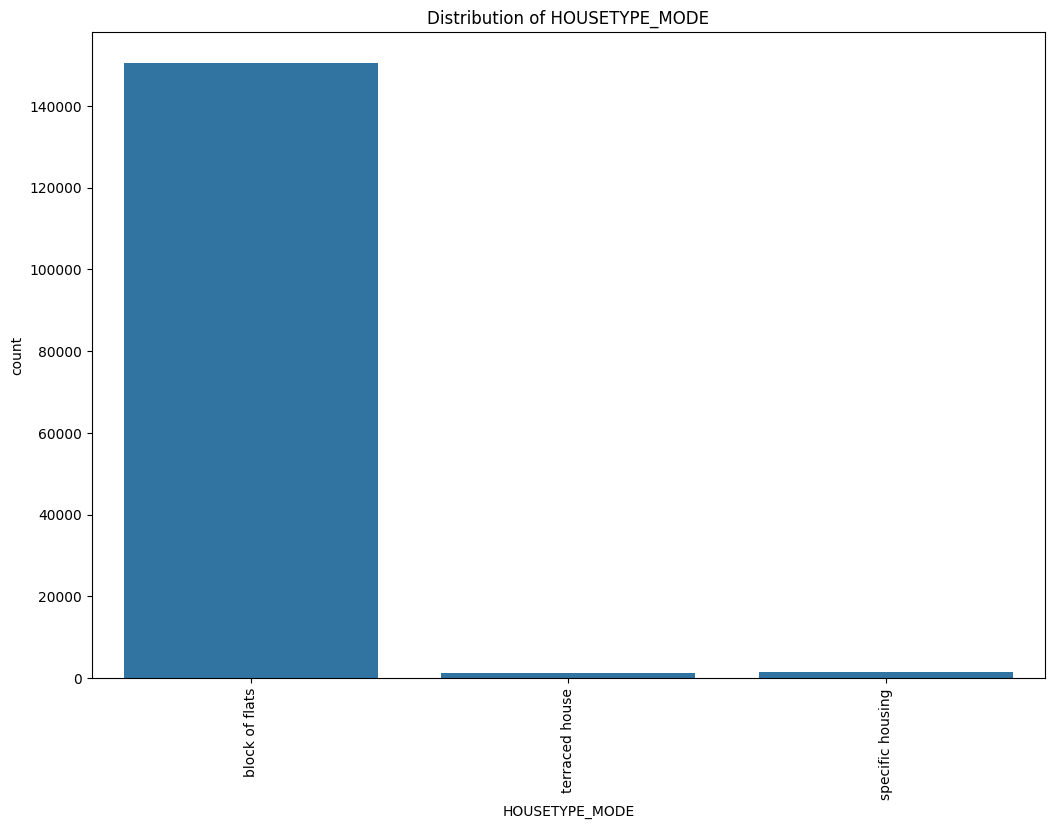

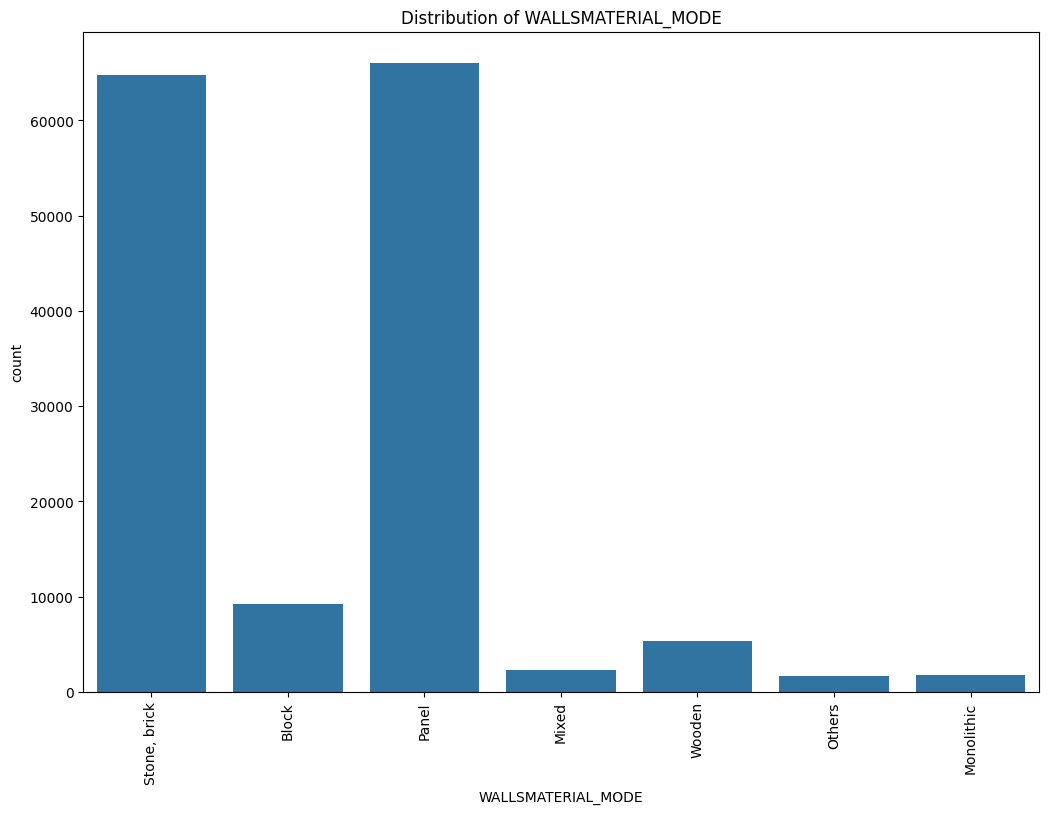

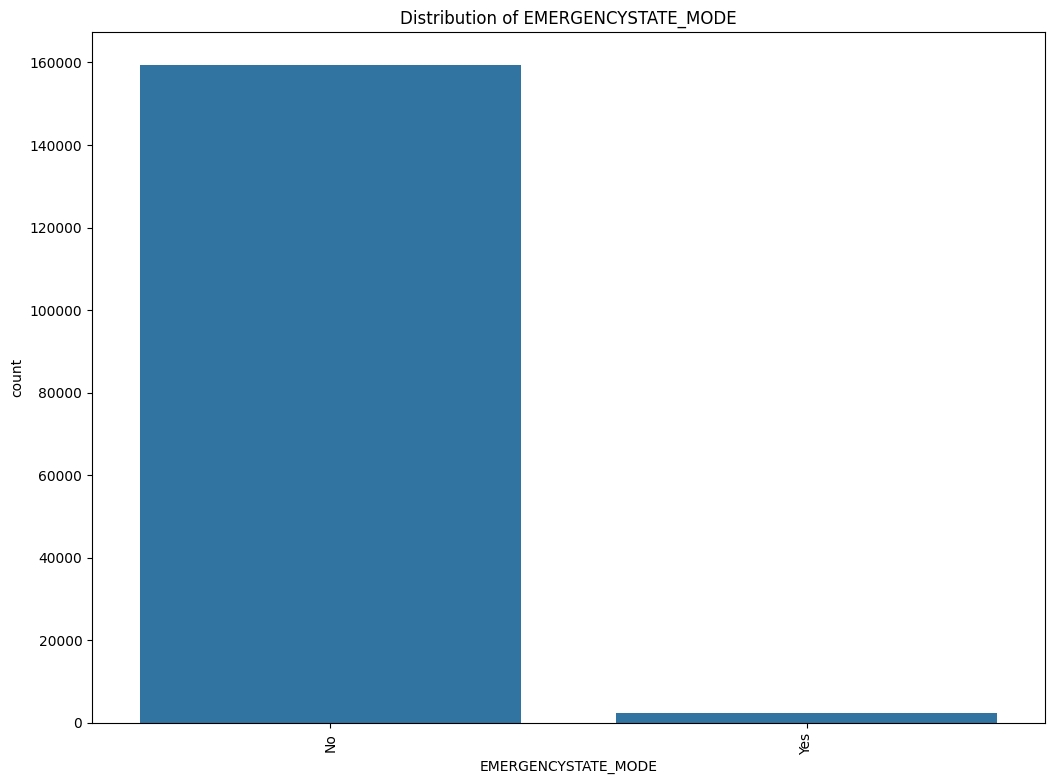

In [114]:
# Plot distribution on categorical columns
# Select categorical columns
cat_cols = application_train_df.select_dtypes(include=['object']).columns

# Define batch size for better visualization
batch_size = 1
num_batches = int(np.ceil(len(cat_cols) / batch_size))

# Plot in smaller groups
for i in range(num_batches):
    batch_cols = cat_cols[i * batch_size:(i + 1) * batch_size]
    
    # Plot each categorical column
    plt.figure(figsize=(30, 15))
    for j, col in enumerate(batch_cols, 1):
        plt.subplot(2, 3, j)  # Adjust rows and columns based on your batch size
        sns.countplot(data=application_train_df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    
    plt.tight_layout()
    plt.show()


Most of applicants apply for cash loans and the largest type of housing is house/apartment. Interestingly, the number of people within business entity type 3 applying for loans amounts to nearly 70,000, far more than other type of organization.

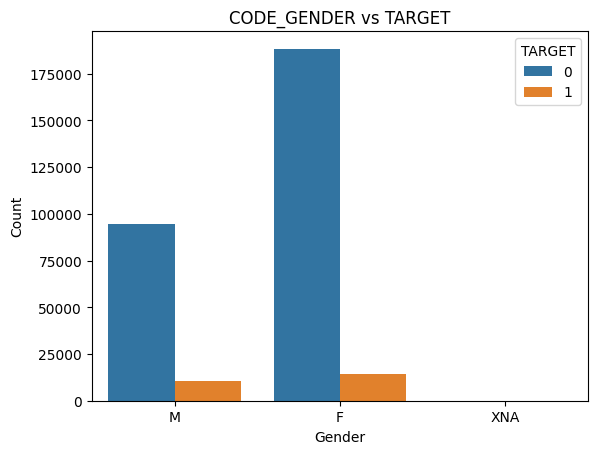

In [115]:
# Count plot for CODE_GENDER vs TARGET
sns.countplot(x='CODE_GENDER', hue='TARGET', data=application_train_df)
plt.title('CODE_GENDER vs TARGET')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Interestingly, male has a higher proportion of defaulting on loan than women

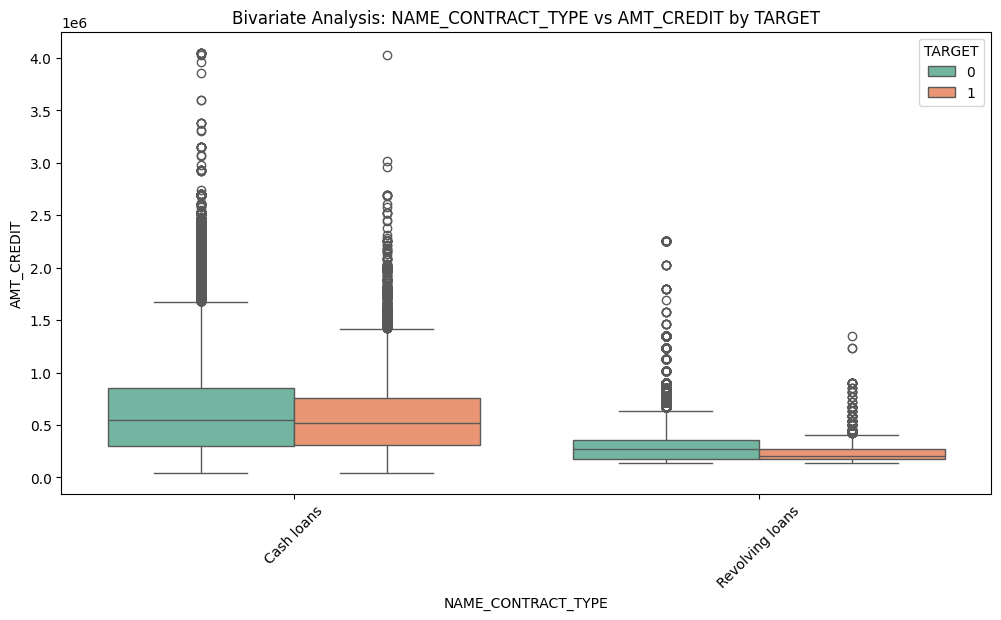

In [116]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a box plot with 'TARGET' as hue to separate the data
sns.boxplot(data=application_train_df, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', hue='TARGET', palette='Set2')

# Add title and labels
plt.title('Bivariate Analysis: NAME_CONTRACT_TYPE vs AMT_CREDIT by TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('AMT_CREDIT')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The credit amount of loan for cash loans is much higher than revolving loans. Also, the non-defaulters usually borrow more than the defaulters.

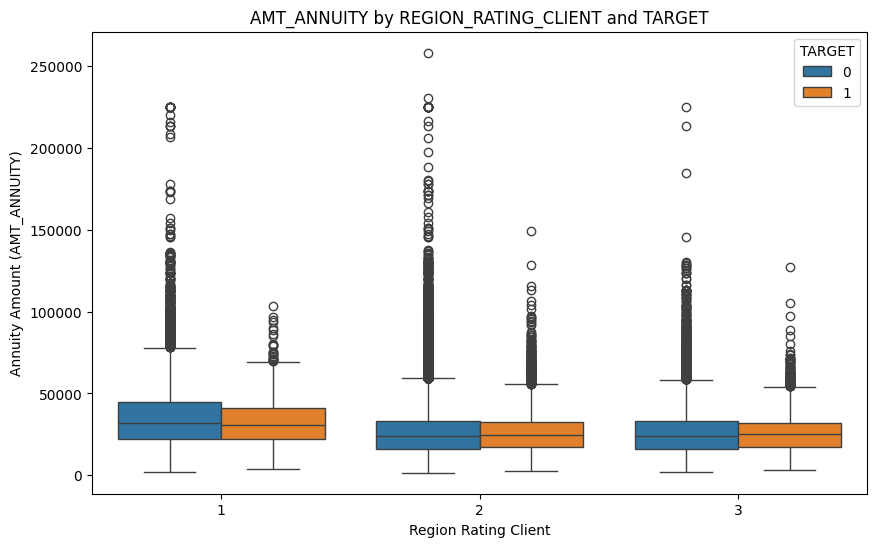

In [117]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for AMT_ANNUITY based on REGION_RATING_CLIENT and TARGET
sns.boxplot(data=application_train_df, x='REGION_RATING_CLIENT', y='AMT_ANNUITY', hue='TARGET')

# Set the labels and title
plt.title('AMT_ANNUITY by REGION_RATING_CLIENT and TARGET')
plt.xlabel('Region Rating Client')
plt.ylabel('Annuity Amount (AMT_ANNUITY)')

# Display the plot
plt.show()

The loan annuity is generally higher in those region rating = 1. 

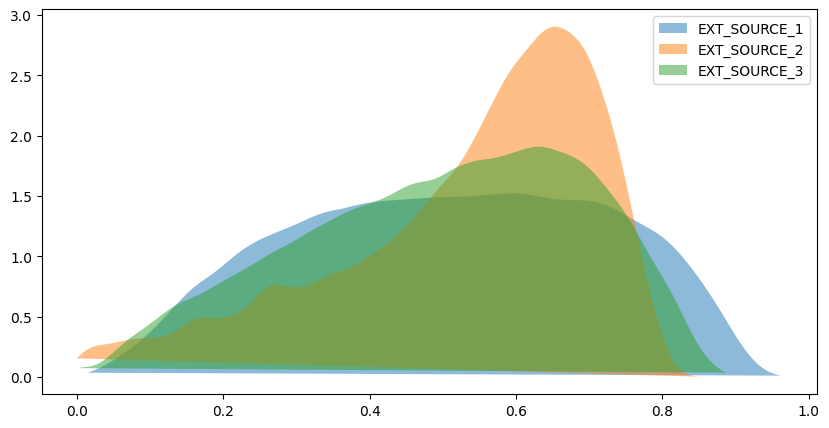

In [118]:
#Plotting the variation in the normalised credit score
from scipy.stats import gaussian_kde

# Replacing inf values with NaN
df_clean = application_train_df.copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values before plotting
df_clean.dropna(subset=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)

# Plot using Scipy's gaussian_kde for the density plot
plt.figure(figsize=(10, 5))

# Create the KDE for each EXT_SOURCE column
for column in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    data = df_clean[column].dropna()
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 1000)
    y_vals = kde(x_vals)
    plt.fill(x_vals, y_vals, label=column, alpha=0.5)

# Add legend and show the plot
plt.legend()
plt.show()


From the plot, it is seen that, 
EXT_SOURCE_2 has a concentrated distribution with a peak of 0.6, suggesting that this score is generally higher and less spread out compared to the other two sources which means it probably has more null values

## **6. Data Cleaning**
###  **a. Data Cleaning on application_train dataset**
####  **1. Evaluating columns with missing values**

In [119]:
# Convert and factorize CAR_AGE_BIN

In [120]:
# Convert OWN_CAR_AGE to float32 to avoid float16 issues
application_train_df["OWN_CAR_AGE"] = application_train_df["OWN_CAR_AGE"].astype("float32")

# Apply pd.cut() after ensuring the correct dtype
# Apply pd.cut(), making a new feature
application_train_df["CAR_AGE_BIN"] = pd.cut(application_train_df["OWN_CAR_AGE"], 
                             labels=["new", "old", "quite old", "very old"], 
                             bins=[0, application_train_df["OWN_CAR_AGE"].quantile(0.25), 
                                   application_train_df["OWN_CAR_AGE"].median(), 
                                   application_train_df["OWN_CAR_AGE"].quantile(0.75), 
                                   application_train_df["OWN_CAR_AGE"].max()])

# For rows that were originally missing, assign 'none' explicitly
application_train_df["CAR_AGE_BIN"] = application_train_df["CAR_AGE_BIN"].cat.add_categories("none")  # Add "none" as a category
application_train_df["CAR_AGE_BIN"] = application_train_df["CAR_AGE_BIN"].fillna("none")  

# Show the result
print(application_train_df[['OWN_CAR_AGE', 'CAR_AGE_BIN']])

# factorize
application_train_df['CAR_AGE_BIN'] = pd.Categorical(application_train_df['CAR_AGE_BIN'], categories=["none", "very old", "quite old", "old", "new"], \
                                               ordered=True) #order of value matter
print(application_train_df['CAR_AGE_BIN'])

application_train_df["CAR_AGE_BIN_Factorized"], _ = pd.factorize(application_train_df["CAR_AGE_BIN"])
application_train_df.drop(columns=["CAR_AGE_BIN"], inplace=True)

        OWN_CAR_AGE CAR_AGE_BIN
0               NaN        none
1               NaN        none
2              26.0    very old
3               NaN        none
4               NaN        none
...             ...         ...
307506          NaN        none
307507          NaN        none
307508          NaN        none
307509          NaN        none
307510          NaN        none

[307511 rows x 2 columns]
0             none
1             none
2         very old
3             none
4             none
            ...   
307506        none
307507        none
307508        none
307509        none
307510        none
Name: CAR_AGE_BIN, Length: 307511, dtype: category
Categories (5, object): ['none' < 'very old' < 'quite old' < 'old' < 'new']


In [121]:
#Change the missing occupations to others
application_train_df["OCCUPATION_TYPE"] = application_train_df["OCCUPATION_TYPE"].fillna("Others")

#Get the count for each occupations
application_train_df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [122]:
# filtering the data that has missing values > 65%
def dropna_over65(df):
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (missing_values / len(df) * 100)

    missing_data_over_65 = missing_percent[missing_percent > 65]
    print(f'There are: {len(missing_data_over_65)} columns missing data over 65%')
    print(missing_data_over_65)

#dropping columns that have more than 65% null values
    df.drop(columns = missing_data_over_65.index, inplace=True)
    print('\n')
    print(f'Shape of the df after removing missing data over 65% : {df.shape}')
    
    return df  

In [123]:
### FIX Wheres the code to run this function?
# what happened to application_test, are we not using it at all?
    # What we do to train must be done to test.


### Checking Numeric Outliers - Train

In [124]:
### FIXED Added Numeric Outlier analysis

### **b. Checking Numeric Outliers

In [125]:
### ALI - checking the stats of the dataframe WITH outliers
application_train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.000000,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.0,0.0,0.0,NaN,NaN,NaN,0.842412
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737305,3.694465e+05,0.000000,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.0,0.0,0.0,0.0,0.0,0.0,1.356541
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010010,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018845,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028656,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,2.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072510,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.0,9.0,8.0,27.0,261.0,25.0,4.000000


In [126]:
numeric_df     = application_train_df.select_dtypes(include=[np.number])
categorical_df =   application_train_df.select_dtypes(exclude=[np.number])

In [127]:
numeric_df.columns.to_list() # Using .select_dtypes we can filter for numeric datatypes.
                             # These are the numeric columns:

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [128]:
application_train_df['CNT_CHILDREN'].value_counts().sort_index(ascending=True)
# We can see some people have 19 children according to the dataset. This is statistically rare.
# For any records have have > 6 children, they will be imputed to 6 children.


CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: count, dtype: int64

In [129]:
# ALI fixing CNT_CHILDREN TRAIN

application_train_df['CNT_CHILDREN'] = np.where(application_train_df['CNT_CHILDREN'] > 6, 6, application_train_df['CNT_CHILDREN'])





application_train_df['CNT_CHILDREN'].value_counts().sort_index(ascending=True)

# CNT Children is much more reasonable now.

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
5        84
6        42
Name: count, dtype: int64

In [130]:
application_train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0,307511.000000
mean,278180.518577,0.080729,0.416753,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.000000,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.0,0.0,0.0,NaN,NaN,NaN,0.842412
std,102790.175348,0.272419,0.718240,2.371231e+05,4.024908e+05,14493.737305,3.694465e+05,0.000000,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.0,0.0,0.0,0.0,0.0,0.0,1.356541
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010010,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018845,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028656,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,2.000000
max,456255.000000,1.000000,6.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072510,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.0,9.0,8.0,27.0,261.0,25.0,4.000000


In [131]:
# ALI IMPUTING numeric Outliers (Except TARGET & CNT CHILDREN as that has been fixed already)

# Technique: capping
        # all values exceeding +- 3std from the mean are capped at 3std.
        # this is to make sure the data is consistent.

In [132]:
import numpy as np
import pandas as pd

def cap_outliers_sd(df, threshold=3, exclude_columns=None):
    """
    Caps outliers at ±3 standard deviations for all numeric columns,
    except those in exclude_columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): Standard deviation threshold (default is 3).
    exclude_columns (list): List of column names to exclude from capping.

    Returns:
    pd.DataFrame: DataFrame with outliers capped for numeric columns only.
    """
    if exclude_columns is None:
        exclude_columns = []

    df_capped = df.copy()  # Ensure we don't modify the original DataFrame
    
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numeric_columns:
        if column in exclude_columns:
            continue  # Skip excluded column
        
        mean = df[column].mean()
        std_dev = df[column].std()

        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev

        df_capped[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

# Exclude 'CNT_CHILDREN' and apply the function to all numeric columns
exclude_cols = ['CNT_CHILDREN', 'TARGET']
application_train_df = cap_outliers_sd(application_train_df, exclude_columns=exclude_cols)


In [133]:
application_train_df.describe()

# Now the Outliers for the numeric columns have been capped within 3STD from the mean
# CNT_CHILDREN and TARGET remained unaffected. 


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307499.000000,3.072330e+05,307511.0,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0,307511.000000
mean,278180.518577,0.080729,0.416753,167742.203125,5.956653e+05,26940.255859,5.346746e+05,0.0,-16036.995067,63815.045904,...,0.000044,0.000035,0.000018,0.0,0.0,0.0,NaN,NaN,NaN,0.842412
std,102790.175348,0.272419,0.718240,91699.343750,3.899719e+05,13689.883789,3.555105e+05,0.0,4363.988632,141275.766519,...,0.001799,0.001533,0.001011,0.0,0.0,0.0,0.0,0.0,0.0,1.356541
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.0,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,2.700000e+05,16524.000000,2.385000e+05,0.0,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,278202.000000,0.000000,0.000000,147150.000000,5.135310e+05,24903.000000,4.500000e+05,0.0,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
75%,367142.500000,0.000000,1.000000,202500.000000,8.086500e+05,34596.000000,6.795000e+05,0.0,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,2.000000
max,456255.000000,1.000000,6.000000,880167.375000,1.806498e+06,70589.781250,1.646736e+06,0.0,-7489.000000,365243.000000,...,0.073757,0.068060,0.055231,0.0,0.0,0.0,27.0,261.0,25.0,4.000000


In [134]:
### **c. Factorize all Categorical Columns for TRAIN

Since 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' seem like important columns, we will first bin the values and factorise these particular columns first.

In [135]:
def factorize_application(df):
    bins = [0, 0.3, 0.6, 0.8, 1.0]
    labels = ['Very Poor', 'Average', 'Good', 'Excellent']

    # Replacing NaN values with 0
    for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
        df[col] = df[col].fillna(0).astype('float32')  
    
    # Binning and creating new category columns
    for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
        df[col + '_Category'] = pd.cut(df[col], bins=bins, labels=labels, right=False)
    
    # Dropping original EXT_SOURCE columns
    df.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace = True)
    
    # Factorizing the category columns
    for col in ['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']:
        df[col] = pd.factorize(df[col])[0]

    print(f"Factorized Columns: {['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']}")
    return df



In [136]:
factorize_application(application_train_df)

Factorized Columns: ['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,2,2,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,1


The rest of the categorical columns are factorized here.
the labelEncode will detect columns with binary categories are factorize accordingly whereas the OneHotEncoder, will factorize columns with more than two uniq columns. Below is the function for that.

In [137]:


def factorize_cat_cols(df):
    
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = pd.factorize(df[col])[0]
    return df

In [138]:
application_train_df.shape

(307511, 121)

### d. Cleaning Application Test

In [139]:
### FIX clean application test with the same guidelines as train

In [140]:
# Convert and factorize CAR_AGE_BIN

In [141]:
# Convert OWN_CAR_AGE to float32 to avoid float16 issues
application_test_df["OWN_CAR_AGE"] = application_test_df["OWN_CAR_AGE"].astype("float32")

# Apply pd.cut() after ensuring the correct dtype
# Apply pd.cut(), making a new feature
application_test_df["CAR_AGE_BIN"] = pd.cut(application_test_df["OWN_CAR_AGE"], 
                             labels=["new", "old", "quite old", "very old"], 
                             bins=[0, application_test_df["OWN_CAR_AGE"].quantile(0.25), 
                                   application_test_df["OWN_CAR_AGE"].median(), 
                                   application_test_df["OWN_CAR_AGE"].quantile(0.75), 
                                   application_test_df["OWN_CAR_AGE"].max()])

# For rows that were originally missing, assign 'none' explicitly
application_test_df["CAR_AGE_BIN"] = application_test_df["CAR_AGE_BIN"].cat.add_categories("none")  # Add "none" as a category
application_test_df["CAR_AGE_BIN"] = application_test_df["CAR_AGE_BIN"].fillna("none")  

# Show the result
print(application_test_df[['OWN_CAR_AGE', 'CAR_AGE_BIN']])

# factorize
application_test_df['CAR_AGE_BIN'] = pd.Categorical(application_test_df['CAR_AGE_BIN'], categories=["none", "very old", "quite old", "old", "new"], \
                                               ordered=True) #order of value matter
print(application_test_df['CAR_AGE_BIN'])

application_test_df["CAR_AGE_BIN_Factorized"], _ = pd.factorize(application_test_df["CAR_AGE_BIN"])
application_test_df.drop(columns=["CAR_AGE_BIN"], inplace=True)

       OWN_CAR_AGE CAR_AGE_BIN
0              NaN        none
1              NaN        none
2              5.0         old
3              NaN        none
4             16.0    very old
...            ...         ...
48739          NaN        none
48740          NaN        none
48741          4.0         new
48742          NaN        none
48743         22.0    very old

[48744 rows x 2 columns]
0            none
1            none
2             old
3            none
4        very old
           ...   
48739        none
48740        none
48741         new
48742        none
48743    very old
Name: CAR_AGE_BIN, Length: 48744, dtype: category
Categories (5, object): ['none' < 'very old' < 'quite old' < 'old' < 'new']


In [142]:
#Change the missing occupations to others
application_test_df["OCCUPATION_TYPE"] = application_test_df["OCCUPATION_TYPE"].fillna("Others")

#Get the count for each occupations
application_test_df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Others                   15605
Laborers                  8655
Sales staff               5072
Core staff                4361
Managers                  3574
Drivers                   2773
High skill tech staff     1854
Accountants               1628
Medicine staff            1316
Security staff             915
Cooking staff              894
Cleaning staff             656
Private service staff      455
Low-skill Laborers         272
Secretaries                213
Waiters/barmen staff       178
Realty agents              138
HR staff                   104
IT staff                    81
Name: count, dtype: int64

### Checking Numeric Outliers - Test

In [143]:
### ALI - checking the stats of the dataframe WITH outliers
application_test_df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.0,...,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,4.269500e+04,48744.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.238281,4.626188e+05,0.021240,-16068.084605,67485.366322,-inf,...,0.0,0.0,0.0,0.002108,0.001803,0.002789,0.009300,0.546875,inf,0.826215
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368164,3.367102e+05,0.014435,4325.900393,144348.507136,inf,...,0.0,0.0,0.0,0.046387,0.046143,0.054047,0.110962,0.693359,1.838867e+00,1.337317
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23728.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010010,-19637.000000,-2910.000000,-7460.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018845,-15785.000000,-1293.000000,-4488.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028656,-12496.000000,-296.000000,-1901.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+00,1.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072510,-7338.000000,365243.000000,0.0,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,1.700000e+01,4.000000


In [144]:
application_test_df['CNT_CHILDREN'].value_counts().sort_index(ascending=True)


CNT_CHILDREN
0     34685
1      9504
2      3949
3       535
4        49
5        12
6         3
7         1
8         3
11        2
20        1
Name: count, dtype: int64

In [145]:
# ALI fixing CNT_CHILDREN TEST

application_test_df['CNT_CHILDREN'] = np.where(application_test_df['CNT_CHILDREN'] > 6, 6, application_test_df['CNT_CHILDREN'])





application_test_df['CNT_CHILDREN'].value_counts().sort_index(ascending=True)

# CNT Children is much more reasonable now.

CNT_CHILDREN
0    34685
1     9504
2     3949
3      535
4       49
5       12
6       10
Name: count, dtype: int64

In [146]:
application_test_df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.0,...,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,4.269500e+04,48744.000000
mean,277796.676350,0.396418,1.784318e+05,5.167404e+05,29426.238281,4.626188e+05,0.021240,-16068.084605,67485.366322,-inf,...,0.0,0.0,0.0,0.002108,0.001803,0.002789,0.009300,0.546875,inf,0.826215
std,103169.547296,0.700219,1.015226e+05,3.653970e+05,16016.368164,3.367102e+05,0.014435,4325.900393,144348.507136,inf,...,0.0,0.0,0.0,0.046387,0.046143,0.054047,0.110962,0.693359,1.838867e+00,1.337317
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23728.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010010,-19637.000000,-2910.000000,-7460.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018845,-15785.000000,-1293.000000,-4488.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028656,-12496.000000,-296.000000,-1901.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+00,1.000000
max,456250.000000,6.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072510,-7338.000000,365243.000000,0.0,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,1.700000e+01,4.000000


In [147]:
# ALI IMPUTING numeric Outliers (Except TARGET & CNT CHILDREN as that has been fixed already)

# Technique: capping
        # all values exceeding +- 3std from the mean are capped at 3std.
        # this is to make sure the data is consistent.

# THIS time for TEST

In [148]:
exclude_cols = ['CNT_CHILDREN', 'TARGET']
application_test_df = cap_outliers_sd(application_test_df, exclude_columns=exclude_cols)

In [149]:
application_test_df.describe()

# Now the Outliers for the numeric columns have been capped within 3STD from the mean
# CNT_CHILDREN and TARGET remained unaffected. 


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized
count,48744.000000,48744.000000,48744.000000,4.874400e+04,48720.000000,48744.000,48744.000000,48744.000000,48744.000000,48744.0,...,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.0,48744.000000
mean,277796.676350,0.396418,176149.578125,5.108383e+05,29231.666016,456352.500,0.020966,-16068.084605,67485.366322,-inf,...,0.0,0.0,0.0,0.000294,0.000230,0.000448,0.002838,0.540039,inf,0.826215
std,103169.547296,0.700219,85767.570312,3.443766e+05,15154.252930,314260.875,0.013565,4325.900393,144348.507136,inf,...,0.0,0.0,0.0,0.006439,0.005672,0.008583,0.031036,0.667480,NaN,1.337317
min,100001.000000,0.000000,26941.500000,4.500000e+04,2295.000000,45000.000,0.000253,-25195.000000,-17463.000000,-23728.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,inf,0.000000
25%,188557.750000,0.000000,112500.000000,2.606400e+05,17973.000000,225000.000,0.010010,-19637.000000,-2910.000000,-7460.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,277549.000000,0.000000,157500.000000,4.500000e+05,26199.000000,396000.000,0.018845,-15785.000000,-1293.000000,-4488.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,367555.500000,1.000000,225000.000000,6.750000e+05,37390.500000,630000.000,0.028656,-12496.000000,-296.000000,-1901.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000
max,456250.000000,6.000000,482999.593750,1.612932e+06,77475.343750,1472749.500,0.064575,-7338.000000,365243.000000,0.0,...,0.0,0.0,0.0,0.141235,0.140259,0.164917,0.342285,2.626953,inf,4.000000


In [150]:
### **c. Factorize all Categorical Columns for TEST

In [151]:
factorize_application(application_test_df)

Factorized Columns: ['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.000000,inf,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.000000,inf,0,1,1,1
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,1.000000,inf,1,2,0,2
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1472749.5,...,0.0,0.0,0.0,0.0,0.000000,inf,0,1,2,2
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,0.0,0.0,0.0,0.000000,inf,0,2,0,2
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,0.0,0.0,0.0,2.626953,inf,4,0,0,0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,0.0,0.0,0.0,0.000000,inf,0,1,2,1


In [152]:
application_test_df.shape

(48744, 122)

it appears that after cleaning the data, the application_train_df has
121 columns, whereas the application_test_df has 122. columns

The application_train_df should be the dataframe that has 1 more column than the test set.
So we will match the columns in both dataframes (except for TARGET)

### e. Matching both Train and Test to have the same columns (EXCEPT TARGET)

In [153]:
import pandas as pd

# Get the list of columns from application_train_df, excluding 'TARGET'
train_columns = application_train_df.columns.drop('TARGET', errors='ignore')

# Ensure application_test_df has the same columns as train (excluding TARGET)
application_test_df = application_test_df.reindex(columns=train_columns)


In [154]:
print(f'The shape of application_train is: {application_train_df.shape}')
print(f'The shape of application_test is: {application_test_df.shape}')

The shape of application_train is: (307511, 121)
The shape of application_test is: (48744, 120)


#### 2. Evaluating highly-correlated columns
Remove highly-correlated numerical variables with greater than 0.8 correlation score using correlation matrix
Remove highly-correlated categorical variables and other irrelevant columns using domain knowledge

In [155]:
# Step 1: Select only numeric columns ### FIX: Should we Drop the heatmap chart??
numeric_columns = application_train_df.select_dtypes(include=['number']).columns

# Step 2: Compute the correlation matrix for numeric columns
correlation_matrix = application_train_df[numeric_columns].corr()


In [156]:
# Drop highly-correlated numerical variables
# Identify pairs of features with correlation above a threshold
def redundant_data(df):
    threshold = 0.8
    to_drop = []  # List to store columns to drop

# Looping through the correlation matrix to find highly correlated pairs
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                if colname not in to_drop:
                    to_drop.append(colname)

# Drop one column from each highly correlated pair
    to_drop = list(set(to_drop) & set(df.columns))

    # Drop columns
    df.drop(columns=to_drop, inplace=True)
    print(f"Dropped {len(to_drop)} redundant columns")
    print(f"The columns names that were dropped are :{to_drop}")
    print('\n')
    print(f"Shape of the dataset after removing multicolinearitly: {df.shape}")

    return df

### ** c. Imputing NA values in the Remaining Columns**
For all numeric columns the na values will be replaced with the median of the column 
for all categorical columns that were factorised, the na values will be replaced with the mode of the column

In [157]:
### FIX clarify  median for categoricals? was the most frequent option used ie mode

def imputing_na(df):
    for col in df.columns:
        if not df[col].dtype == 'number':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    print("Imputed all na values")
    return df


In [158]:
## cleaned dataset

In [159]:
#calling all the functions for data cleaning for Train

dropna_over65(application_train_df)

factorize_cat_cols(application_train_df)
print(application_train_df.shape)

imputing_na(application_train_df)
print(application_train_df.shape)

redundant_data(application_train_df)
print(application_train_df.shape)


There are: 17 columns missing data over 65%
COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
dtype: float64


Shape of the df after removing missing data over 65% : (307511, 104)
(307511, 104)
Imputed all na values
(307511, 104)
Dropped 9 redundant columns
The columns names that were dropped are :['LIVE_REGION_NOT_WORK_REGION', 'AMT_GOODS_PRICE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_M

In [160]:
#calling all the functions for data cleaning for Test

dropna_over65(application_test_df)

factorize_cat_cols(application_test_df)
print(application_test_df.shape)

imputing_na(application_test_df)
print(application_test_df.shape)

redundant_data(application_test_df)
print(application_test_df.shape)

There are: 17 columns missing data over 65%
COMMONAREA_AVG              68.716150
COMMONAREA_MEDI             68.716150
COMMONAREA_MODE             68.716150
NONLIVINGAPARTMENTS_MEDI    68.412523
NONLIVINGAPARTMENTS_AVG     68.412523
NONLIVINGAPARTMENTS_MODE    68.412523
FONDKAPREMONT_MODE          67.284179
LIVINGAPARTMENTS_AVG        67.249302
LIVINGAPARTMENTS_MEDI       67.249302
LIVINGAPARTMENTS_MODE       67.249302
FLOORSMIN_MEDI              66.605121
FLOORSMIN_AVG               66.605121
FLOORSMIN_MODE              66.605121
OWN_CAR_AGE                 66.289184
YEARS_BUILD_MODE            65.275726
YEARS_BUILD_AVG             65.275726
YEARS_BUILD_MEDI            65.275726
dtype: float64


Shape of the df after removing missing data over 65% : (48744, 103)
(48744, 103)
Imputed all na values
(48744, 103)
Dropped 9 redundant columns
The columns names that were dropped are :['LIVE_REGION_NOT_WORK_REGION', 'AMT_GOODS_PRICE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_MEDI

In [161]:
application_train_df.isna().sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_YEAR    0
CAR_AGE_BIN_Factorized        0
EXT_SOURCE_1_Category         0
EXT_SOURCE_2_Category         0
EXT_SOURCE_3_Category         0
Length: 95, dtype: int64

In [162]:
application_test_df.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_YEAR    0
CAR_AGE_BIN_Factorized        0
EXT_SOURCE_1_Category         0
EXT_SOURCE_2_Category         0
EXT_SOURCE_3_Category         0
Length: 94, dtype: int64

In [163]:
application_train_df['CAR_AGE_BIN_Factorized'].isna().sum()

np.int64(0)

In [164]:
application_test_df['CAR_AGE_BIN_Factorized'].isna().sum()

np.int64(0)

In [165]:
application_train_df.isna().sum().sum()

np.int64(0)

In [166]:
application_train_df.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,...,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.658370,0.340108,0.306327,0.416753,167742.203125,5.956653e+05,26939.556641,...,0.0,0.0,0.0,NaN,NaN,NaN,0.842412,0.540381,1.244089,1.090163
std,102790.175348,0.272419,0.293509,0.474284,0.473746,0.460968,0.718240,91699.343750,3.899719e+05,13690.075195,...,0.0,0.0,0.0,0.0,0.0,0.0,1.356541,0.841623,0.726447,0.897795
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112500.000000,2.700000e+05,16524.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,147150.000000,5.135310e+05,24903.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,202500.000000,8.086500e+05,34596.000000,...,0.0,0.0,0.0,0.0,0.0,3.0,2.000000,1.000000,2.000000,2.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,880167.375000,1.806498e+06,70589.781250,...,0.0,0.0,0.0,27.0,261.0,25.0,4.000000,3.000000,3.000000,3.000000


In [167]:
application_test_df.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
count,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,48744.000000,48744.000000,...,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000
mean,277796.676350,0.009006,0.329600,0.337129,0.309495,0.396418,176149.578125,5.108383e+05,29255.421875,0.236973,...,0.000258,0.000201,0.000392,0.002487,0.473145,inf,0.826215,1.451091,1.055022,0.989968
std,103169.547296,0.094474,0.470073,0.472734,0.462290,0.700219,85767.570312,3.443766e+05,15188.276367,0.755041,...,0.006031,0.005310,0.008034,0.029068,0.649414,NaN,1.337317,0.810419,0.926448,0.821091
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26941.500000,4.500000e+04,2295.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,inf,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,0.000000,0.000000,0.000000,0.000000,112500.000000,2.606400e+05,17973.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000
50%,277549.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157500.000000,4.500000e+05,26221.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,1.000000
75%,367555.500000,0.000000,1.000000,1.000000,1.000000,1.000000,225000.000000,6.750000e+05,37390.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,2.000000,2.000000,2.000000
max,456250.000000,1.000000,1.000000,1.000000,1.000000,6.000000,482999.593750,1.612932e+06,77475.343750,6.000000,...,0.141235,0.140259,0.164917,0.342285,2.626953,inf,4.000000,3.000000,3.000000,3.000000


In [168]:
# Drop columns whose name contains 'FLAG_DOCUMENT' for train
application_train_df = application_train_df.loc[:, ~application_train_df.columns.str.contains('FLAG_DOCUMENT')]

columns_to_drop = [
    'NAME_TYPE_SUITE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 
    'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 
    'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE', 'REG_REGION_NOT_LIVE_REGION'
]

# Drop unwanted columns from the DataFrame
application_train_df = application_train_df.drop(columns=columns_to_drop, errors='ignore')

# Show the updated DataFrame
application_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int32  
 1   TARGET                      307511 non-null  int8   
 2   NAME_CONTRACT_TYPE          307511 non-null  int64  
 3   CODE_GENDER                 307511 non-null  int64  
 4   FLAG_OWN_CAR                307511 non-null  int64  
 5   FLAG_OWN_REALTY             307511 non-null  int64  
 6   CNT_CHILDREN                307511 non-null  int8   
 7   AMT_INCOME_TOTAL            307511 non-null  float32
 8   AMT_CREDIT                  307511 non-null  float32
 9   AMT_ANNUITY                 307511 non-null  float32
 10  NAME_INCOME_TYPE            307511 non-null  int64  
 11  NAME_EDUCATION_TYPE         307511 non-null  int64  
 12  NAME_FAMILY_STATUS          307511 non-null  int64  
 13  NAME_HOUSING_T

In [169]:
# Drop columns whose name contains 'FLAG_DOCUMENT' for Test
application_test_df = application_test_df.loc[:, ~application_test_df.columns.str.contains('FLAG_DOCUMENT')]

columns_to_drop = [
    'NAME_TYPE_SUITE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 
    'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 
    'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE', 'REG_REGION_NOT_LIVE_REGION'
]

# Drop unwanted columns from the DataFrame
application_test_df = application_test_df.drop(columns=columns_to_drop, errors='ignore')

# Show the updated DataFrame
application_test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  48744 non-null  int32  
 1   NAME_CONTRACT_TYPE          48744 non-null  int64  
 2   CODE_GENDER                 48744 non-null  int64  
 3   FLAG_OWN_CAR                48744 non-null  int64  
 4   FLAG_OWN_REALTY             48744 non-null  int64  
 5   CNT_CHILDREN                48744 non-null  int8   
 6   AMT_INCOME_TOTAL            48744 non-null  float32
 7   AMT_CREDIT                  48744 non-null  float32
 8   AMT_ANNUITY                 48744 non-null  float32
 9   NAME_INCOME_TYPE            48744 non-null  int64  
 10  NAME_EDUCATION_TYPE         48744 non-null  int64  
 11  NAME_FAMILY_STATUS          48744 non-null  int64  
 12  NAME_HOUSING_TYPE           48744 non-null  int64  
 13  REGION_POPULATION_RELATIVE  487

In [170]:
# Set pandas to display all columns for Train
pd.set_option('display.max_columns', None)

# Now, you can view the DataFrame with all columns
application_train_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,APARTMENTS_MODE,APARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,0,0,0,0,0.0,-9461,-637,-3648.0,-2120,1.0,1.0,0.0,0,2,0.0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1,1,1,0,0.0,-16765,-1188,-1186.0,-291,1.0,1.0,0.0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,0,0,0,0,0.0,-19046,-225,-4260.0,-2531,1.0,1.0,0.0,0,2,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,1
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,0,0,2,0,0.0,-19005,-3039,-9832.0,-2437,1.0,1.0,0.0,0,2,0.0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,0,0,0,0,0.0,-19932,-3038,-4312.0,-3458,1.0,1.0,0.0,1,2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0


In [171]:
# Set pandas to display all columns for Test
pd.set_option('display.max_columns', None)

# Now, you can view the DataFrame with all columns
application_test_df.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,APARTMENTS_MODE,APARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100001,0,0,0,0,0,135000.0,568800.0,20560.5,0,0,0,0,0.018845,-19241,-2329,-5168.0,-812,1.0,1.0,1,0,2,0.0,0,0.067200,0.066589,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,0,0,0,0
1,100005,0,1,0,0,0,99000.0,222768.0,17370.0,0,1,0,0,0.035797,-18064,-4469,-9120.0,-1623,1.0,1.0,0,1,2,0.0,1,0.083984,0.083313,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,0,1,1,1
2,100013,0,1,1,0,0,202500.0,663264.0,69777.0,0,0,0,0,0.019104,-20038,-4458,-2176.0,-3503,1.0,1.0,0,2,2,0.0,2,0.083984,0.083313,inf,0.0,0.0,0.0,0.0,0.0,0.0,1.0,inf,1,2,0,2
3,100028,0,0,0,0,2,315000.0,1575000.0,49018.5,0,1,0,0,0.026398,-13976,-1866,-2000.0,-4208,1.0,1.0,0,3,2,0.0,3,0.310791,0.308105,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,0,1,2,2
4,100038,0,1,1,1,1,180000.0,625500.0,32067.0,0,1,0,0,0.010033,-13040,-2191,-4000.0,-4262,1.0,1.0,0,0,2,0.0,3,0.083984,0.083313,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,2,2,2,0


In [172]:
# Reset the display option to the default
pd.reset_option('display.max_columns')

## 7. **Scaling Data**
Logistic Regression and most ML models perform better on scaled data because they are sensitive to feature magnitudes.

In [173]:
### This is causing errors. So lets skip scaling the data alltogether.

# # scale data for TRAIN

# from sklearn.preprocessing import StandardScaler

# # List of columns to exclude from standardization
# exclude_columns = ['TARGET',
#     'CAR_AGE_BIN_Factorized', 'EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 
#     'EXT_SOURCE_3_Category', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 
#     'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
#     'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 
#     'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE'
# ]

# # Exclude the specified columns from the numeric columns
# columns_to_standardize = [col for col in application_train_df.columns if col not in exclude_columns]

# # Print the columns to standardize
# print("Columns to standardize:", columns_to_standardize)

# # Apply standardization using StandardScaler
# scaler = StandardScaler()
# application_train_df[columns_to_standardize] = scaler.fit_transform(application_train_df[columns_to_standardize])

# # Verify the changes
# application_train_df.head()

In [174]:


from sklearn.model_selection import train_test_split

# Drop the 'SK_ID_CURR' column and separate the target variable (TARGET)
X = application_train_df.drop(columns=['SK_ID_CURR', 'TARGET'])
y = application_train_df['TARGET']

#Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (246008, 39)
Test set shape: (61503, 39)


## 8. **2. Handle Class Imbalance**
Imbalance skews the model towards the majority class, making it harder to predict defaults (1s).

In [175]:
# ### downsample
# from imblearn.under_sampling import RandomUnderSampler

# # Create an instance of RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# # Apply the undersampling to the training data
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# # Verify the class distribution after downsampling
# print("Class distribution in the resampled training set:")
# print(y_train_resampled.value_counts())

# # Check the new shape of the training set
# print(f"Resampled training set shape: {X_train_resampled.shape}")

Class distribution in the resampled training set:
TARGET
0    19876
1    19876
Name: count, dtype: int64
Resampled training set shape: (39752, 39)


In [188]:
from imblearn.under_sampling import RandomUnderSampler

# Define the desired ratio: TARGET 0 should be 4x TARGET 1
sampling_strategy = {0: 4 * 19876, 1: 19876}

# Create an instance of RandomUnderSampler with custom sampling strategy
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Apply undersampling
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Verify class distribution
print("Class distribution in the resampled training set:")
print(y_train_resampled.value_counts())

# Check the new shape
print(f"Resampled training set shape: {X_train_resampled.shape}")


Class distribution in the resampled training set:
TARGET
0    79504
1    19876
Name: count, dtype: int64
Resampled training set shape: (99380, 39)


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Function to perform RFE and return selected features
def imp_features(X_train, X_test, y_train, num_features=10):
    # Ensure SK_ID_CURR is kept separately if present
    X_train_id, X_test_id = None, None
    if 'SK_ID_CURR' in X_train:
        X_train_id, X_test_id = X_train[['SK_ID_CURR']], X_test[['SK_ID_CURR']]
        X_train, X_test = X_train.drop(columns=['SK_ID_CURR']), X_test.drop(columns=['SK_ID_CURR'])

    # Apply Recursive Feature Elimination (RFE)
    log_model = LogisticRegression(max_iter=1000)
    selector = RFE(log_model, n_features_to_select=num_features)
    selector.fit(X_train, y_train)

    # Get the selected feature names
    selected_cols = list(X_train.columns[selector.support_])

    print(f"Selected Features: {selected_cols}")

    # Restore SK_ID_CURR if it was present
    if X_train_id is not None:
        X_train, X_test = pd.concat([X_train_id, X_train[selected_cols]], axis=1), pd.concat([X_test_id, X_test[selected_cols]], axis=1)
    else:
        X_train, X_test = X_train[selected_cols], X_test[selected_cols]

    return X_train, X_test, y_train

# Now, let's use the imp_features function on the downsampled data
X_train_resampled_rfe, X_test_rfe, y_train_resampled = imp_features(X_train_resampled, X_test, y_train_resampled, num_features=10)

# Verify the shape of the training and test sets after feature selection
print(f"Resampled and feature-selected training set shape: {X_train_resampled_rfe.shape}")
print(f"Test set shape (unchanged): {X_test_rfe.shape}")

Selected Features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_MOBIL', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']
Resampled and feature-selected training set shape: (39752, 10)
Test set shape (unchanged): (61503, 10)


In [177]:
## 10. Training The model Using various methods


In [178]:
### a. Logistic Regression Model


In [179]:
# log_model.fit(X_train, y_train)


In [180]:
# # 5. Evaluate
# y_pred = log_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [181]:
### b. Random Classifier Model

In [182]:
# model_RFC = RandomForestClassifier(class_weight='balanced', random_state=42)
# model_RFC.fit(X_train, y_train)

# random_predictions = np.random.choice([0, 1], size=y_test.shape[0], p=[0.7, 0.3])

# # Calculate accuracy of the random classifier
# random_accuracy = accuracy_score(y_test, random_predictions)
# print(f"Random Classifier Accuracy: {random_accuracy:.4f}")

In [183]:
###c. KNN

In [184]:
## 11. Cross Validation

In [185]:
# #Creating an ROC curve
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_train, y_train_preds_proba)
# roc_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1])
# plt.xlabel('False positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve')
# plt.show()

In [186]:
### Merging other Dataframes

The bureau_df has a column named CREDIT_ACTIVE, which has records of the applicants credit history. Every applicant seems to have atleast two records of credits either active or closed. We have tried to convert these rows of data into one and merge it with the main dataset. CREDIT_ACTIVE seems to be an important column for an applicant to default, so we are merging the dataset to improve accuracy

In [187]:
# # Converting multiple records per ID into one based on the condition
# bureau_summarised_df = bureau_df.groupby("SK_ID_CURR")["CREDIT_ACTIVE"].apply(lambda x: "Active" if "Active" in x.values else "Closed").reset_index()

# # Display the result
# print(bureau_summarised_df)